# Техническое задание.
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Исследование данных о продажах компьютерных игр.

### Краткое описание проекта.
Сборный проект №1 на тему "Исследование данных о продажах компьютерных игр."
Необходимо произвести определённые манипуляции с предоставленными данными, чтобы выявить наиболее популярные для продажи игры. Прогноз составляется на 2017 год. По условиям технического задания определяющим является принцип работы с данными, на основе которого в последующем можно будет строить прогнозы на любой последующий год.

### Цель проекта.
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий календарный год.

### Описание данных.
Данные представлены в формате .csv о продажах игр, созданных и продаваемых до 2016 года включительно.
В данных есть пропуски. 
В таблице 11 колонок:
•	Name — название игры;
•	Platform — платформа;
•	Year_of_Release — год выпуска;
•	Genre — жанр игры;
•	NA_sales — продажи в Северной Америке (миллионы проданных копий);
•	EU_sales — продажи в Европе (миллионы проданных копий);
•	JP_sales — продажи в Японии (миллионы проданных копий);
•	Other_sales — продажи в других странах (миллионы проданных копий);
•	Critic_Score — оценка критиков (максимум 100);
•	User_Score — оценка пользователей (максимум 10);
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

### План работы.
1. Изучение общей информации о предоставленных данных.
2. Подготовка данных для последующей обработки.
3. Исследовательский анализ данных. Определение актуального периода в предоставленных данных для получения корректных результатов исследования.
4. Составление портрета пользователя по регионам.
5. Выдвижение и проверка гипотез.
6. Общие выводы по проекту.

### Изучение общей информации о данных.
Открываем файл с данными и изучаем общую информацию.

In [1]:
#импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
#читаем датафрейм
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#смотрим название колонок
cols = list(df.columns)
cols

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [4]:
#смотрим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# смотрим наличие пропусков в данных
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
 #посмотрим на список жанров
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [8]:
 #посмотрим на список имеющихся платформ
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [9]:
# проверяем на наличие явных дубликатов
df.duplicated().sum()

0

### Вывод по изучению общей информации.
Данные представлены в таблице формата .csv - 16 715 строк, 11 колонок. В пяти колонках имеются пропуски. Дубликатов нет. В колонке 'User_Score' имеются значения 'tbd', что означает to be determined, to be done ("нужно определиться") - целесообразно заменить эти значения на NaN.

### Подготовим данные для последующей обработки.

#### Переименуем столбцы и поменяем формат некоторых из них.

In [10]:
# переименование столбцов
for col in cols:
    
    df = df.rename(columns={col : col.lower()})

In [11]:
 #поменяем формат столбца на int64
#df['year_of_release'] = pd.to_datetime(
    #df['year_of_release'], format='%Y',yearfirst=True
#)
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
#Заменим tbd на Nan
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [13]:
# проверим результат
df['user_score'] = df['user_score'].astype('float')
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### Заполним пропуски везде, где это возможно.

In [15]:
# удалим строки (всего их 2), где отсутствует название игры
df = df.dropna(subset=['name'])
df = df.reset_index(drop=True)

In [16]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [17]:
# посмотрим на количество пропусков в %
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [18]:
# удалим строки с пропусками в графе year_of_release, эти строки могут быть неявными дубликатами, и их всего 2%
df = df.dropna(subset=['year_of_release'])
df = df.reset_index(drop = True)

df['year_of_release'].isna().sum()

0

ESRB (сокращение от Entertainment Software Rating Board) предоставляет рейтинги видеоигр для США, Канады и Мексики. ESRB использует семь различных рейтингов для игр: Е (ранее К-А) - для всех; Е 10+ - для всех с 10 лет; Т - для подростков; М - взрослые (самый высокий рейтинг). Редкие рейтинги: ЕС - раннее детство и АО - только для взрослых 18+. RP - это заполнитель, означает, что игра ещё не была оценена.

In [19]:
# заполним пропуски в графе 'rating' значением 'RP' (в ожидании рейтинга)
df['rating'] = df['rating'].fillna('no_ESRB')

In [20]:
# сгруппируем данные по платформам
df.groupby('platform').count()

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
platform,,,,,,,,,,
2600,116,116,116,116,116,116,116,0,0,116
3DO,3,3,3,3,3,3,3,0,0,3
3DS,512,512,512,512,512,512,512,166,171,512
DC,52,52,52,52,52,52,52,14,14,52
DS,2121,2121,2121,2121,2121,2121,2121,708,512,2121
GB,97,97,97,97,97,97,97,0,0,97
GBA,811,811,811,811,811,811,811,430,251,811
GC,542,542,542,542,542,542,542,437,357,542
GEN,27,27,27,27,27,27,27,0,0,27


In [21]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [22]:
# Посчитаем суммарные продажи игр во всех регионах и добавим эти данные в таблицу. Для этого создадим новый столбец total_sales
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
#df.head()

In [23]:
df['name'].value_counts()

Need for Speed: Most Wanted           12
FIFA 14                                9
Ratatouille                            9
LEGO Marvel Super Heroes               9
Angry Birds Star Wars                  8
                                      ..
Twisted Metal                          1
Thunder Truck Rally                    1
Ishin no Arashi: Shippuu Ryuumeden     1
Anno 1701: Dawn of Discovery           1
WipEout                                1
Name: name, Length: 11426, dtype: int64

In [24]:
# Посмотрим на обработанные данные
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Вывод по подготовке данных.
- Мы переименовали столбцы, приведя их к нижнему регистру. В столбце 'year_of_release' заменили формат на int64, в столбце 'user_score' заменили формат на float64.
- Пропуски присутствуют в 5 из 11 колонок. Причина появления пропусков в колонках critic_score,	user_score,	rating : не все платформы внесли данные по этим параметрам, 14 платформ такие данные не внесли. Заполнить пропуски в столбцах  critic_score и user_score корректными значениями не представляется возможным. Пропуски в столбце rating мы заполнили значением RP (это заполнитель со значением "в ожидании рейтинга").
- Были удалены строки, где были пропуски в столбцах 'name' (2) и 'year_of_release'(269). 
- В таблицу с данными добавлен ещё один столбец со значениями по суммарным продажам во всех регионах.

## Исследовательский анализ данных.

### Количество выпускаемых в разные годы игр.

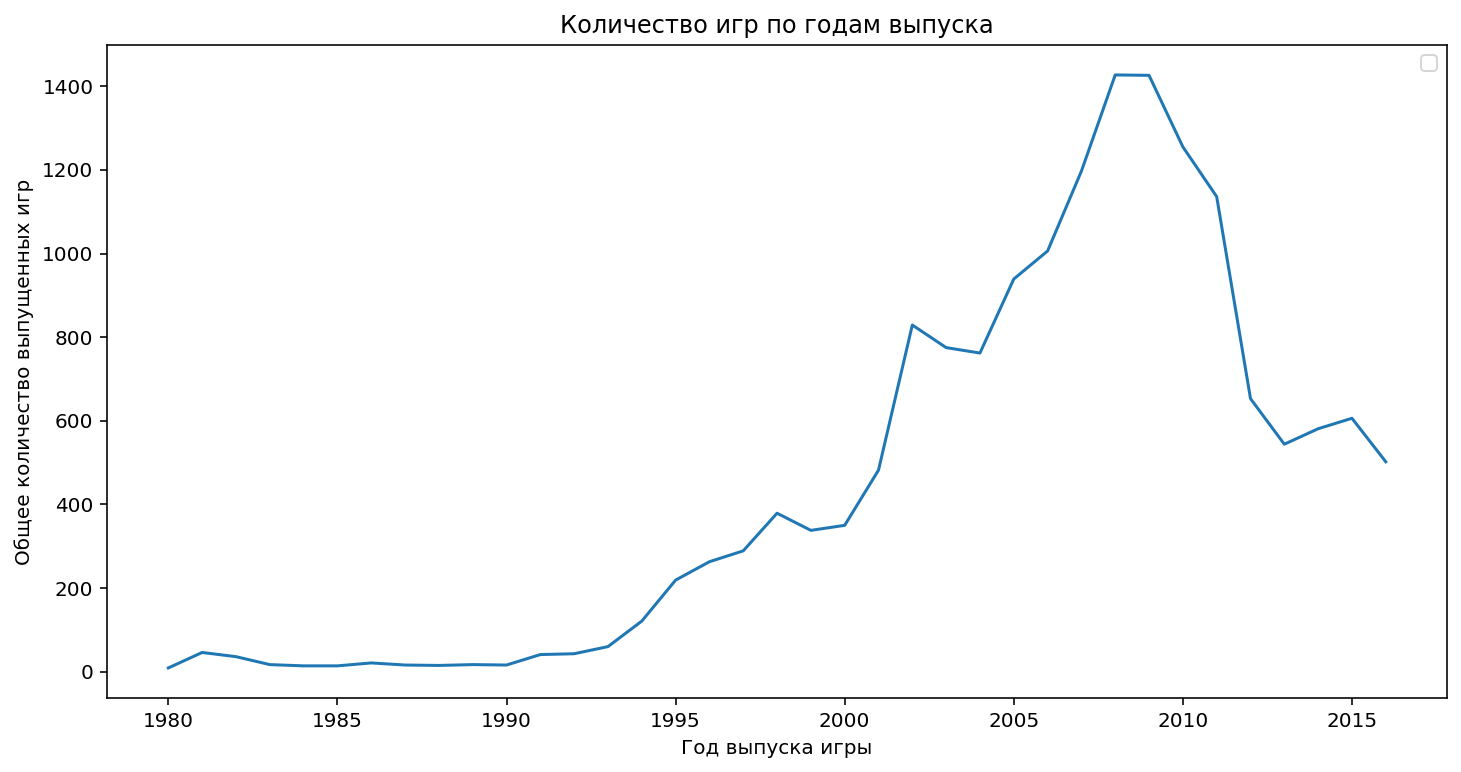

In [25]:
# Изучение изменения количества выпускаемых игр по годам
games_on_period = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_on_period)
plt.title("Количество игр по годам выпуска")
plt.xlabel("Год выпуска игры")
plt.ylabel("Общее количество выпущенных игр")
plt.legend('')
plt.show()

С середины 90-хгодов прошлого столетия резко возрастает выпуск консольных игр. С 2010 года ориентировочно производство консольнных игр так же резко начинает снижаться. Видимо, это связано с началом создания мобильных приложений и мобильных игр. На графике это чётко видно. Период с 1992 по 2012 годы наиболее очевиден для изучения. Но для нашего исследования будет важно изучить период с 2011 по 2016 годы (актуальный период).

### Анализ изменения продаж по платформам.

In [26]:
df['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 37, dtype: Int64

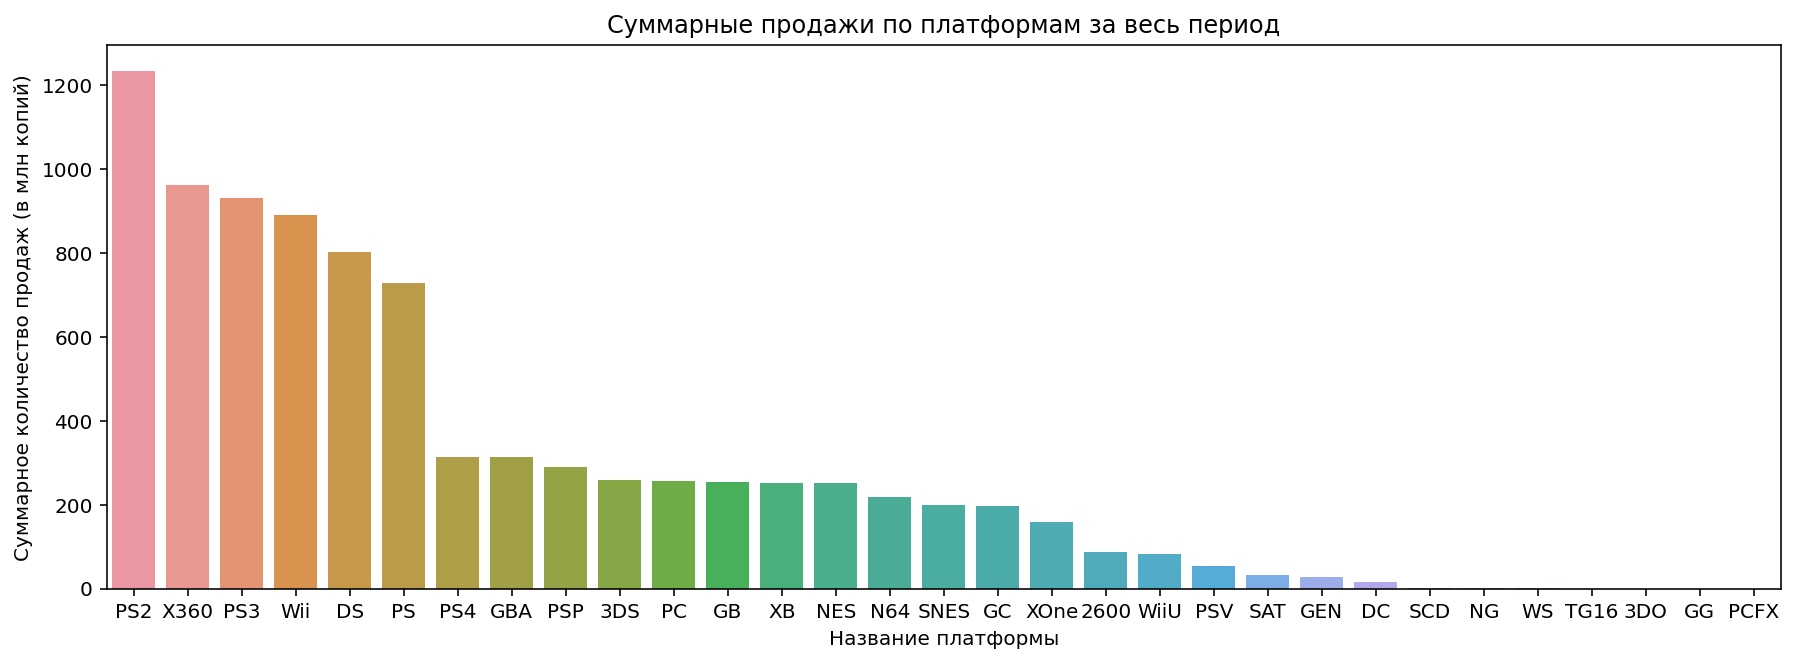

In [27]:
# построим график распределения суммарных продаж платформ по годам
# для этого сперва построим методом барплот график суммарных продаж платформ за весь исследуемый период
# и выберем топ самых успешных платформ
platform_sales = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title("Суммарные продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Суммарное количество продаж (в млн копий)")
plt.show()

In [28]:
# Сделаем отсортировнный датафрейм, содержащий информацию о продажах после 92 года
after92df = df.query('year_of_release >= 1992')
# В итоге получен датафрейм для использования в дальнейшей функции, во избежание лишних сортировок внутри неё

In [29]:
#Исходя из графика выше, видно что наибольшее суммарное количество продаж, с большим отрывом, имеют 6 платиформ.
#Сделаем список этих платформ
list_of_platforms = ['PS2','X360','PS3','Wii','PS','DS']

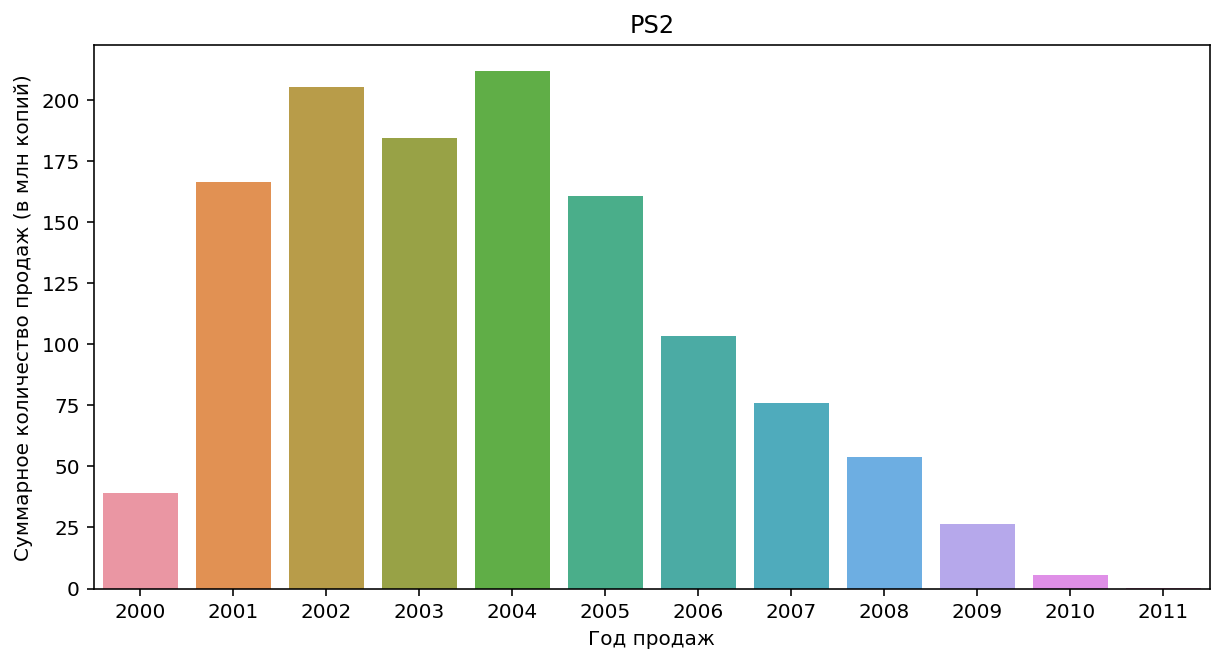

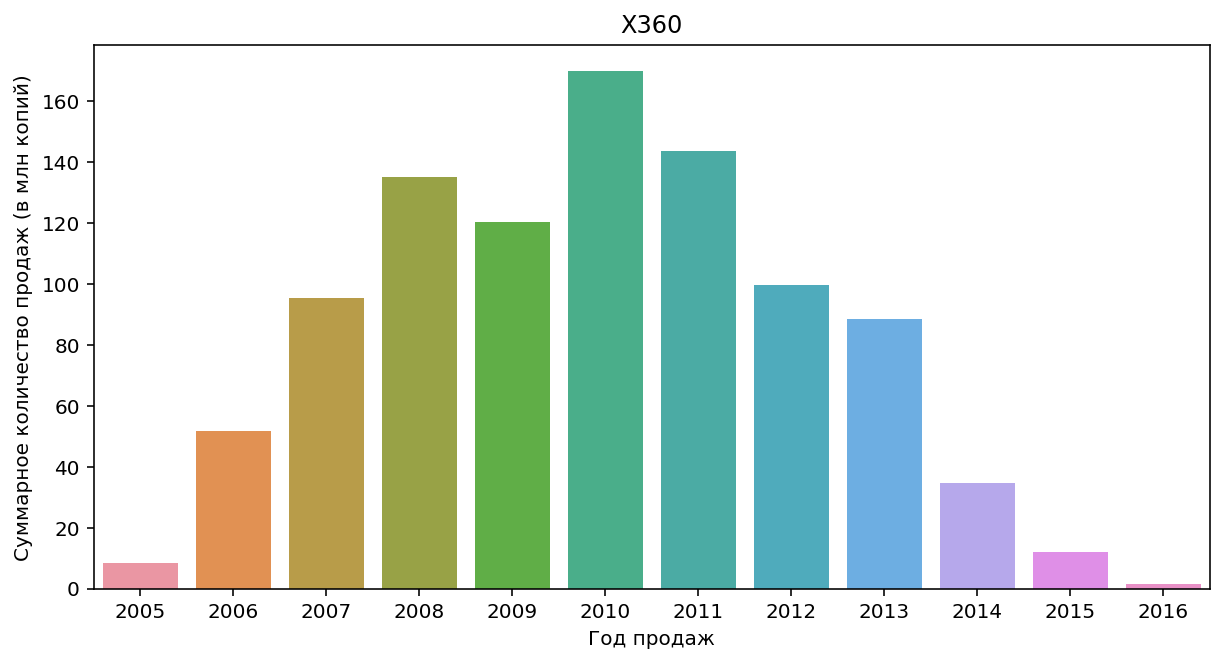

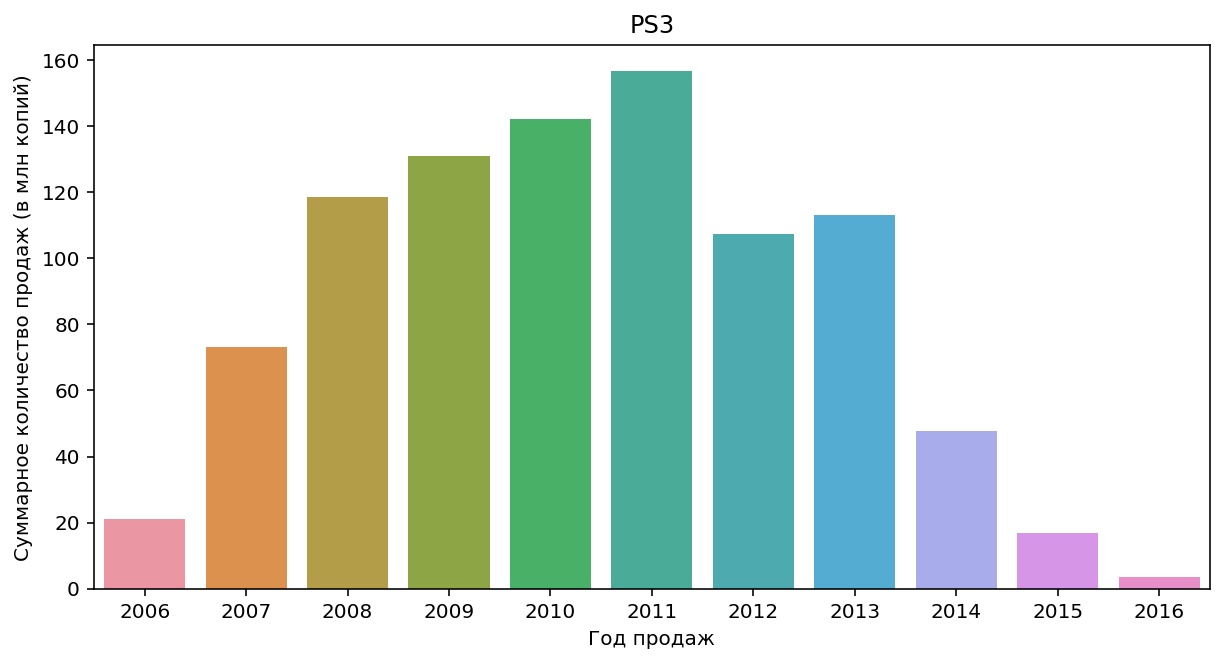

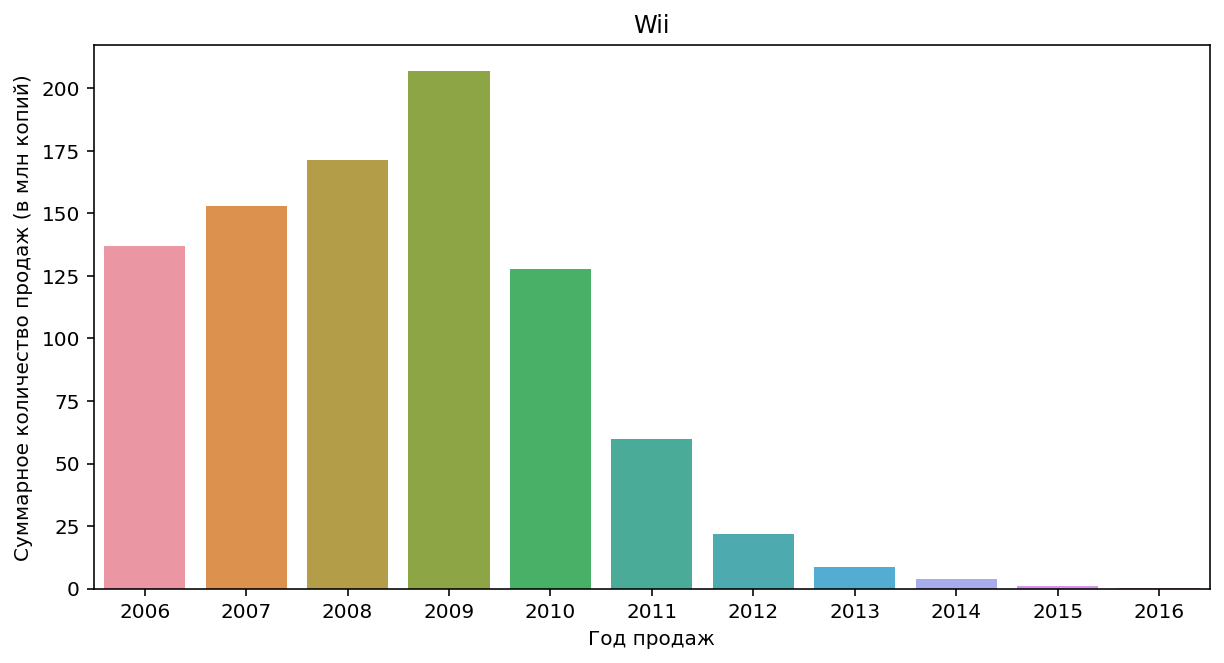

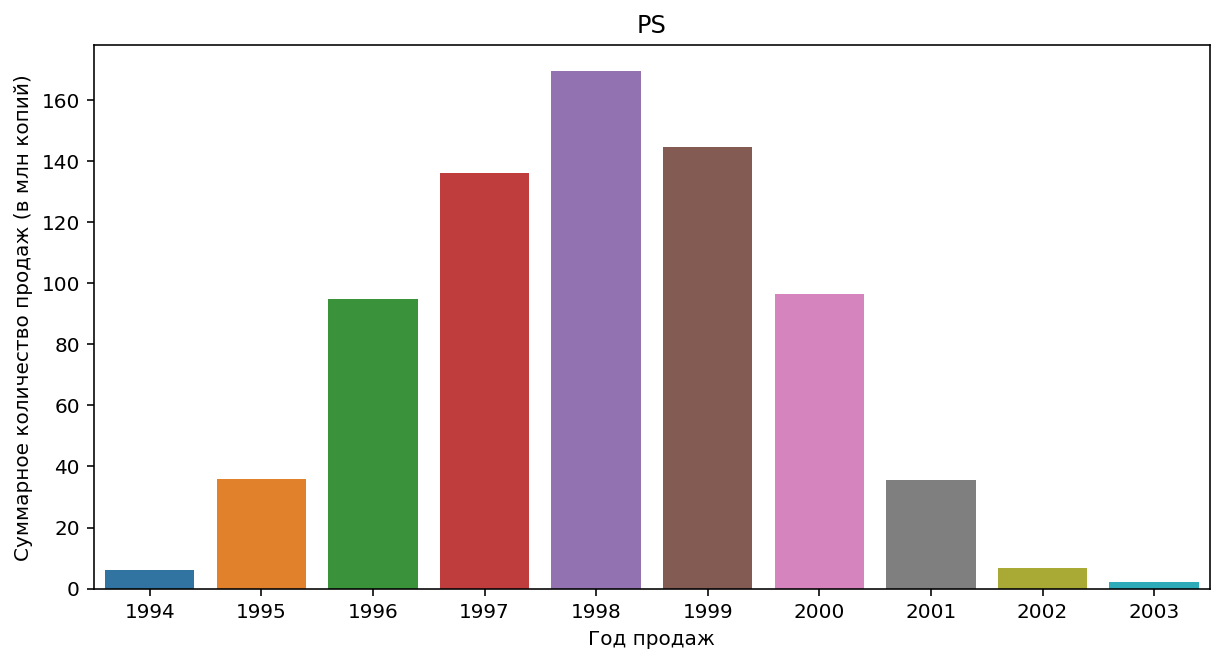

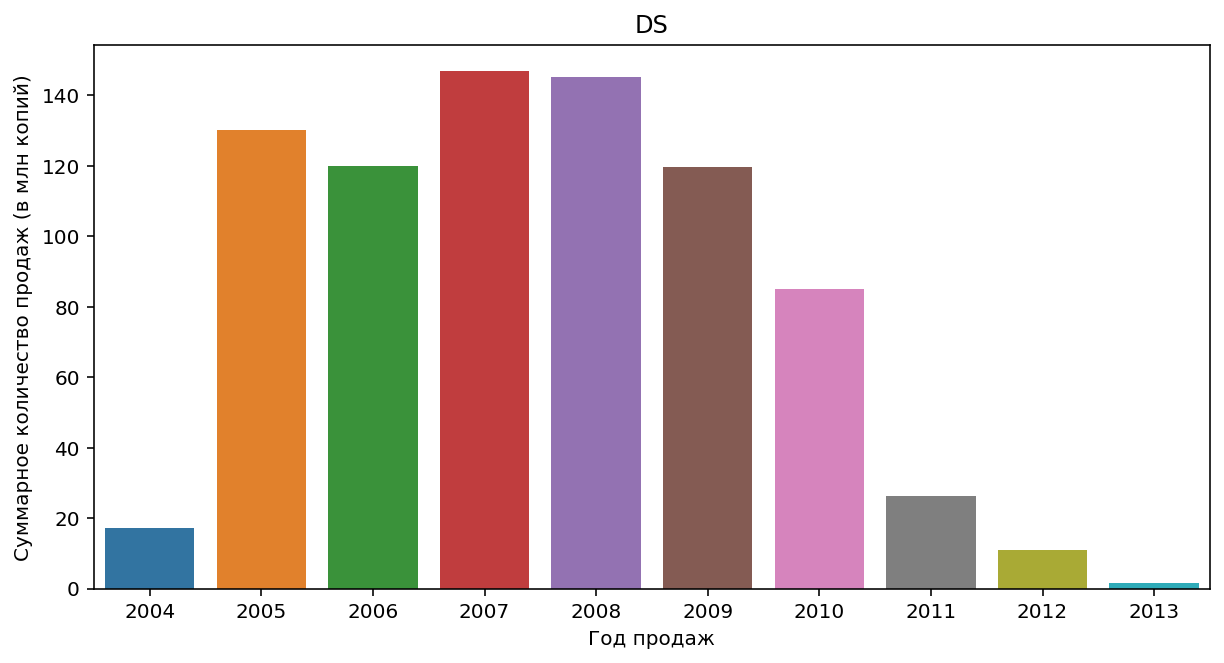

In [30]:
#Напишем цикл для вывода графиков продаж в разрезе по годам для каждой из платиформ-лидеров.
for platform in list_of_platforms:
    tempdf = after92df[after92df['platform'] == platform]
    sales_per_year = tempdf.pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum'
    ).sort_values('year_of_release', ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(x=sales_per_year.index,y=sales_per_year['total_sales'])
    plt.title(platform)
    plt.xlabel("Год продаж")
    plt.ylabel("Суммарное количество продаж (в млн копий)")
    plt.show()

Изучив графики шести самых продаваемых платформ, делаем вывод:с момента запуска платформы продажи резко идут вверх 4-5 лет, достигают пика и последующие 5-7 лет они идут на спад. Средний срок существования платформы - 10 - 11 лет. В график попали платформы PS, PS2 и PS3 (бренд, принадлежащий Sony Interactive Entertainment) - наиболее успешные игровые консоли. Здесь можно наблюдать, что на момент падения популярности действующей модели - на рынок выводится следующая. Графики платформ X360 и DS имеют те же характеристики. А вот продажи платформы Wii отличаются: начальная точка продаж находится на уровне 130 млн копий, взлёт продаж более резкий и кратковременный, линия последующего затухания продаж похожа на все предыдущие графики.

### Анализируем данные по продажам после 2012 года.

In [31]:
# Создадим датафрейм с данными о самых продаваемых играх на платформах после 2012 года
top_after2012 = df.query("year_of_release>=2012")
top_after2012 = top_after2012.sort_values(by='total_sales', ascending=False).head(50)
top_after2012 = top_after2012.reset_index().rename_axis(None, axis=1)
#top_after2012
 


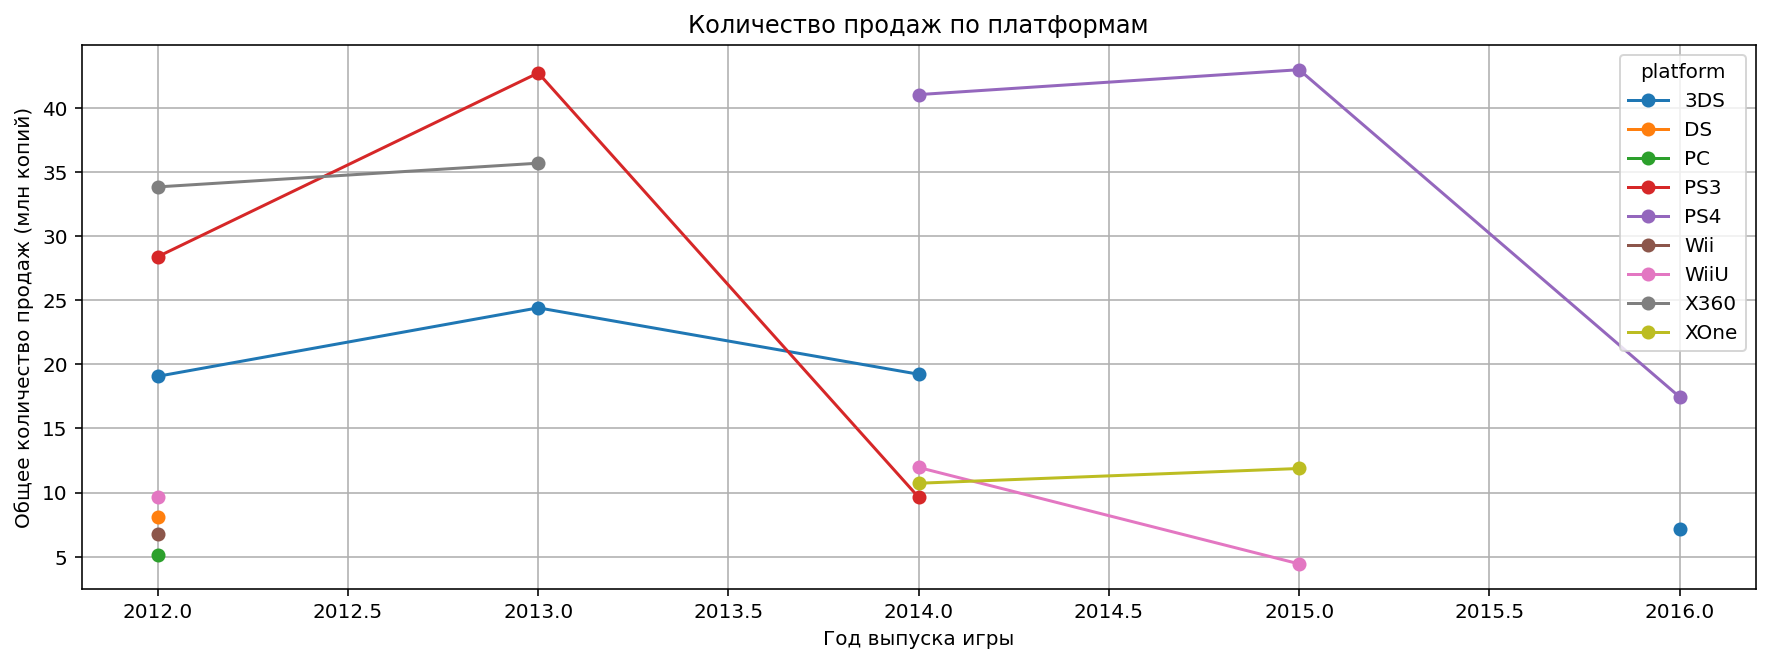

In [32]:
# отрисуем графики продаж
top_after2012.pivot_table(index='year_of_release', 
                           columns='platform', 
                           values='total_sales', 
                           aggfunc='sum').plot(grid=True, figsize=(15, 5), style ='o-')
plt.title("Количество продаж по платформам")
plt.xlabel("Год выпуска игры")
plt.ylabel("Общее количество продаж (млн копий)")
plt.show()

Исходя из анализа данных, можно утверждать, что на момент начала 2017 года потенциально прибыльными являются платформы 3DS, PS4, WiiU, XOne. Добавим ещё платформу PC. На момент окончания 2016 года нет растущих платформ.

### Анализируем глабальные продажи игр в разбивке по платформам.

In [33]:
# создадим отсортированную таблицу
actual_period_data = df.query('year_of_release >= 2012')

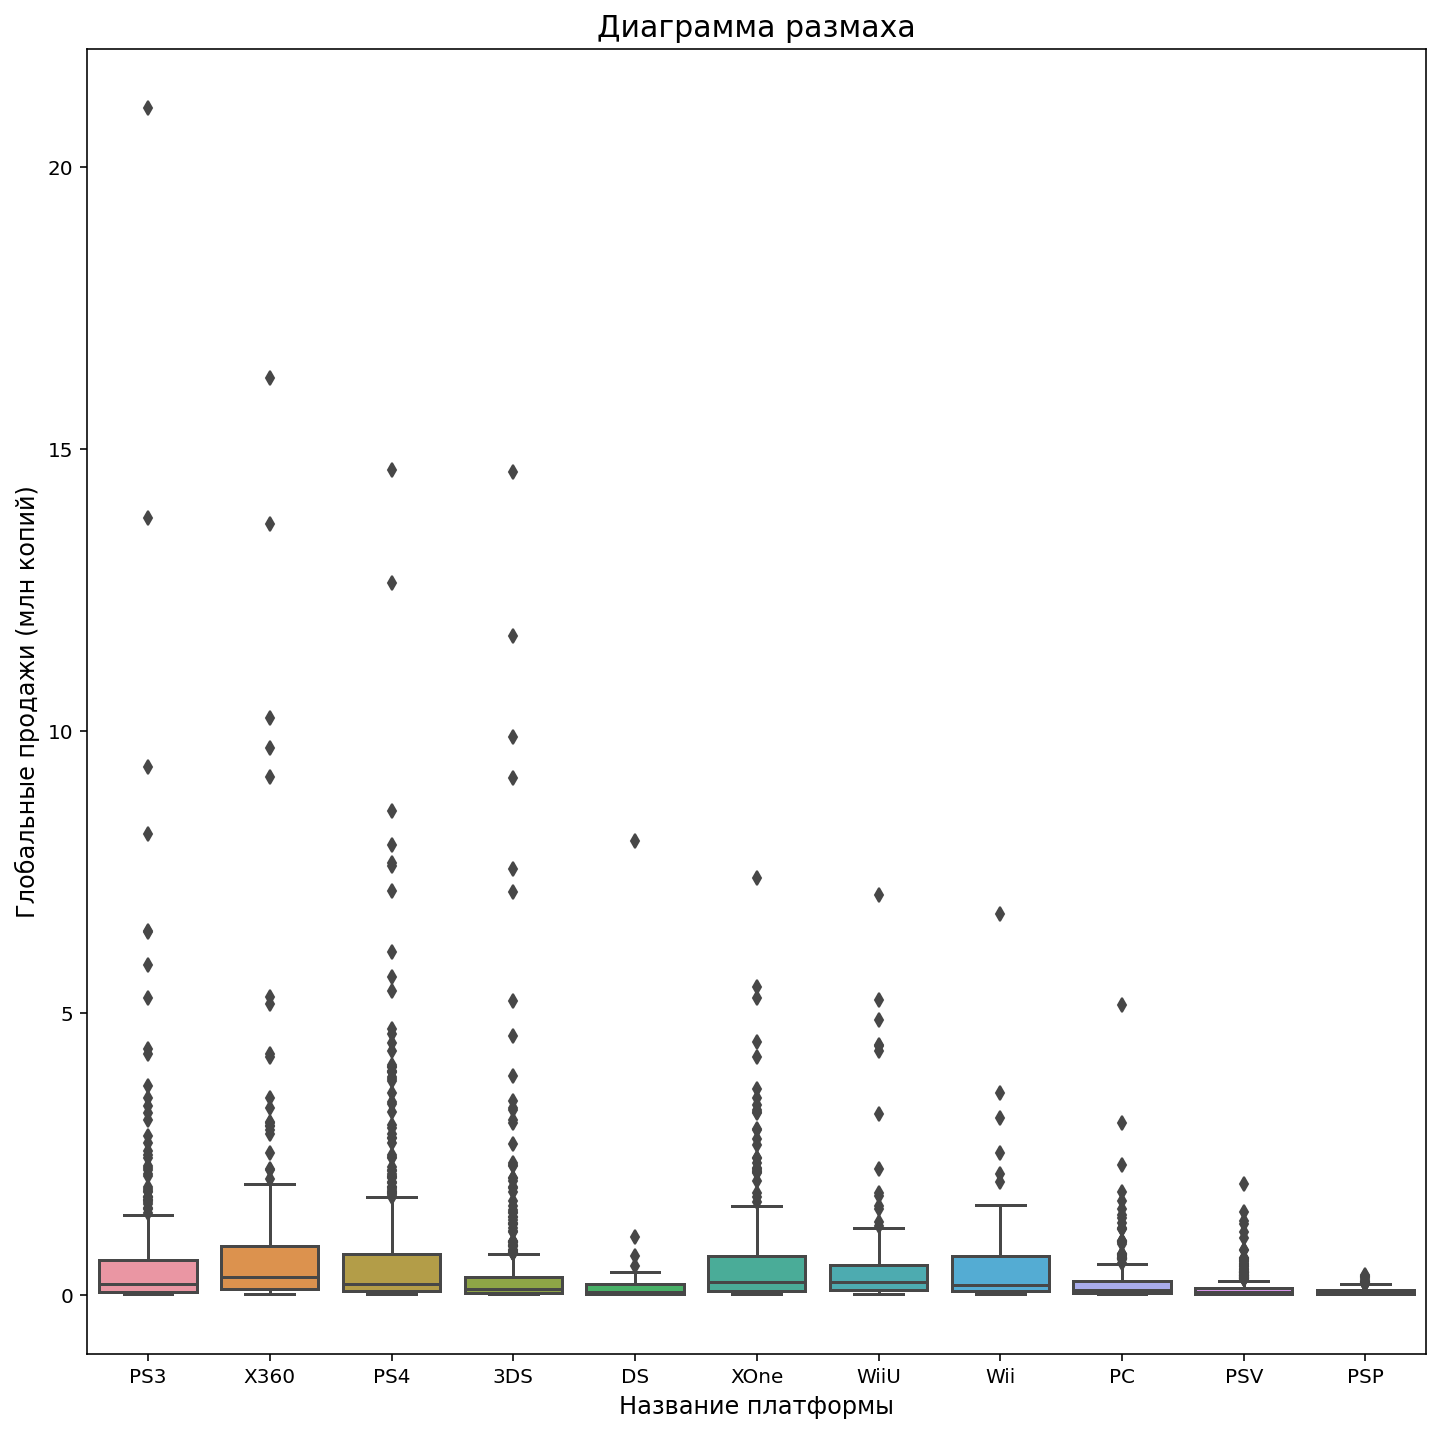

In [34]:
#Отрисуем ящики с усами полные за актуальный период
plt.figure(figsize=(12,12))
sns.boxplot(x='platform', y='total_sales', data=actual_period_data)
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Название платформы', fontsize=12)
plt.ylabel('Глобальные продажи (млн копий)',fontsize=12)
plt.show()

Выбросы указывают на выпуски очень продаваемых игр. Судя по диаграмме - у каждой из платформ они случаются. Меньше всего таких проектов -у платформ PSP, PSV и DS. Самые успешные, "выстреливающие" проекты - у платформы PS3.

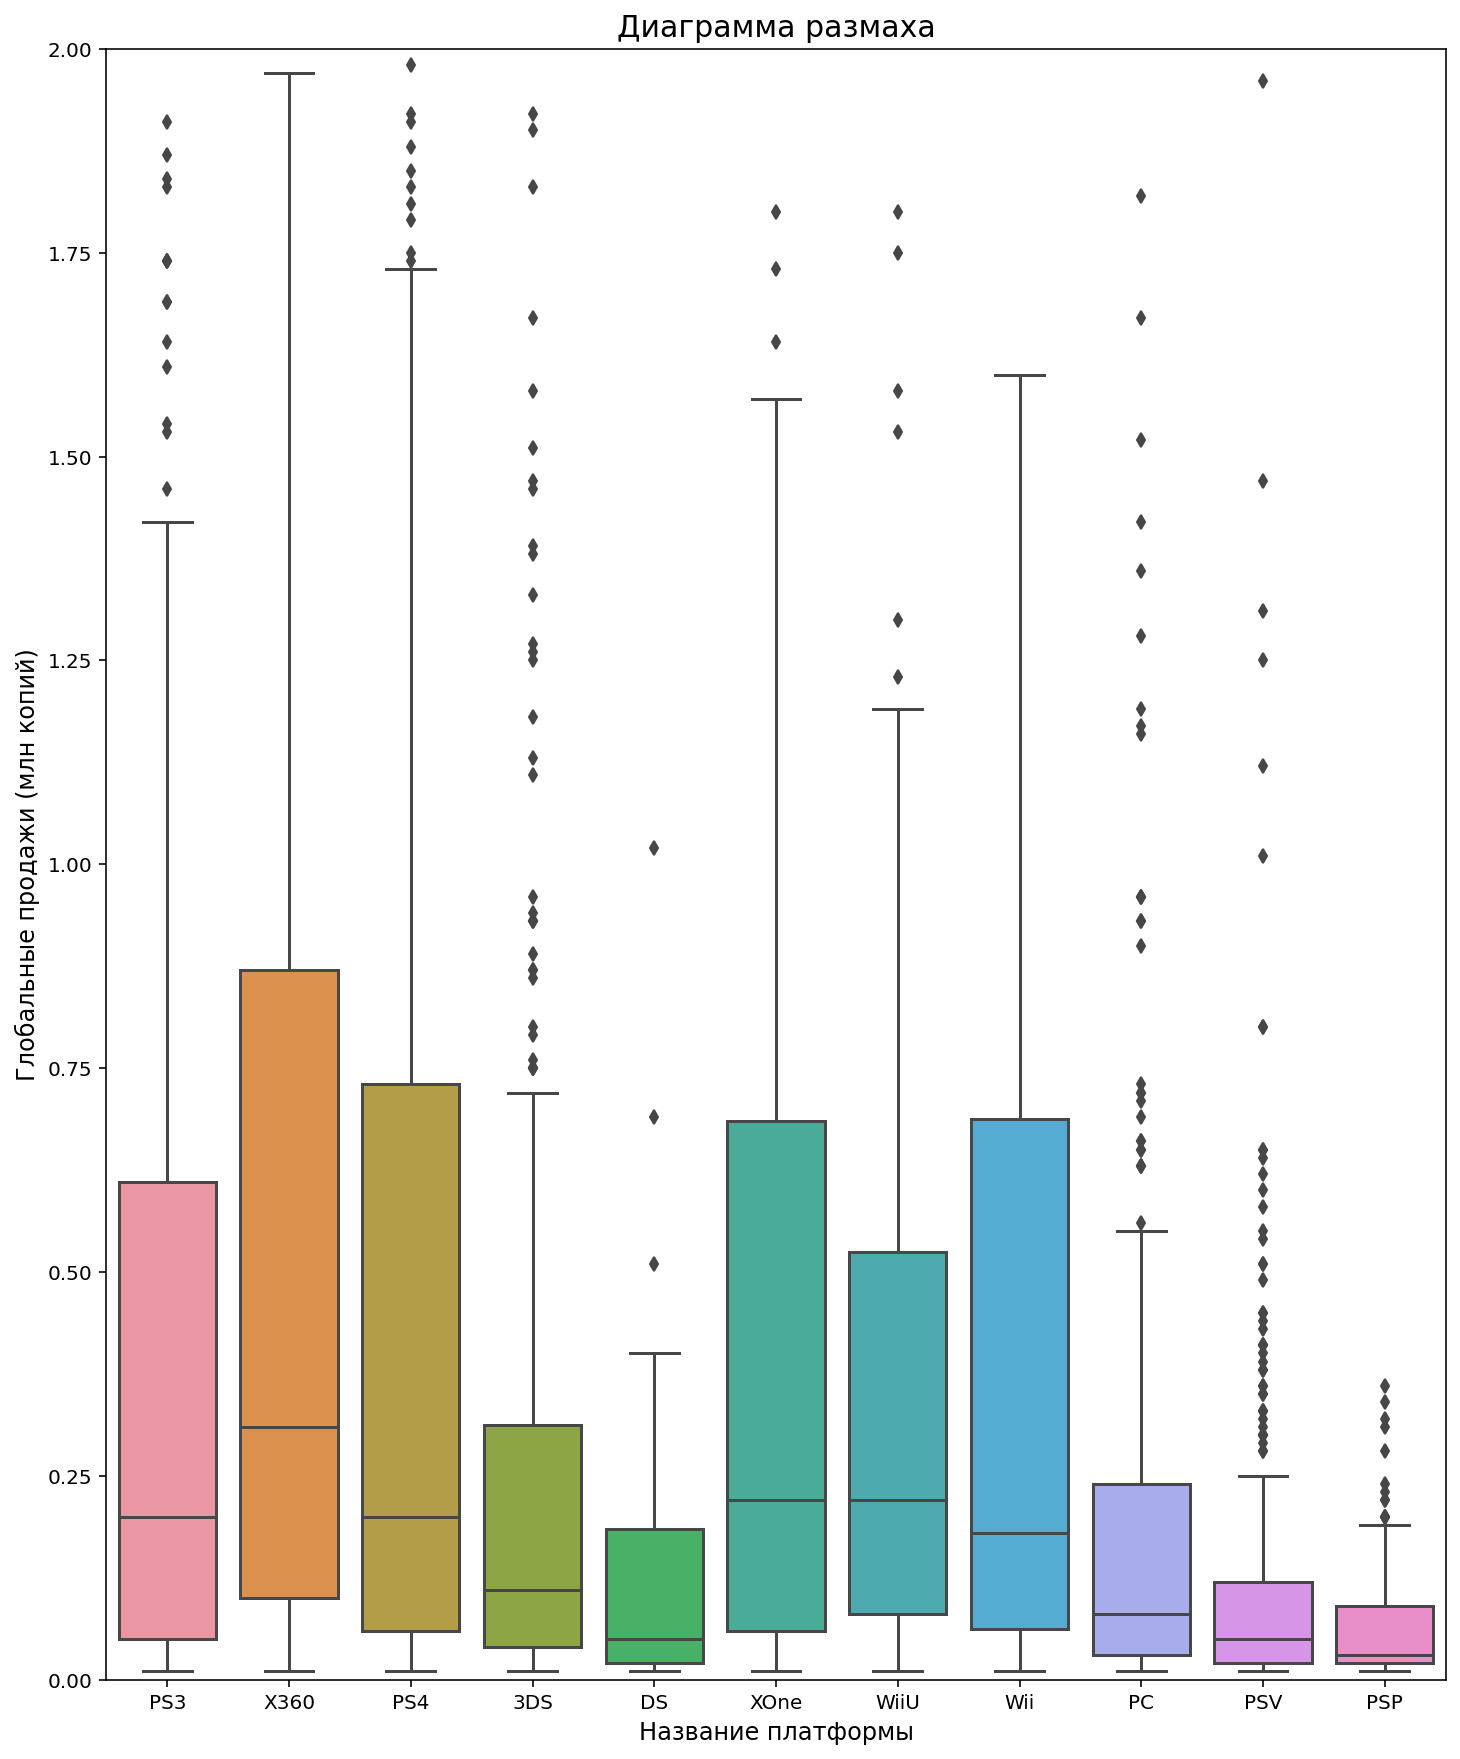

In [35]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,15))
sns.boxplot(x='platform', y='total_sales', data=actual_period_data)
plt.ylim([0,2])
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Название платформы', fontsize=12)
plt.ylabel('Глобальные продажи (млн копий)',fontsize=12)
plt.show()

Судя по диаграммам размаха, распределение продаж на каждой из платформ далеко от нормального. На каждой платформе максимальные стабильные продажи происходят ближе к началу продаж. Далее случаются выбросы - выпуск успешных хорошо продаваемых игр. Самой успешной в плане продаж игровых копий является платформа Х360 (здесь самая большая область распределения). Медианы продаж у всех платформ, удерживающихся после 2012 года на рынке, смещены в сторону минимальных значений продаж, что подтверждает данные графиков о начавшемся периоде спада продаж на каждой из платформ в актуальном периоде. Самые низкие продажи - на платформах PSP и PSV.

### Анализируем влияние отзывов на продажи внутри одной платформы.

In [71]:
# убедимся. что данные у нас за актуальный период
actual_period_data.year_of_release.min()

2012

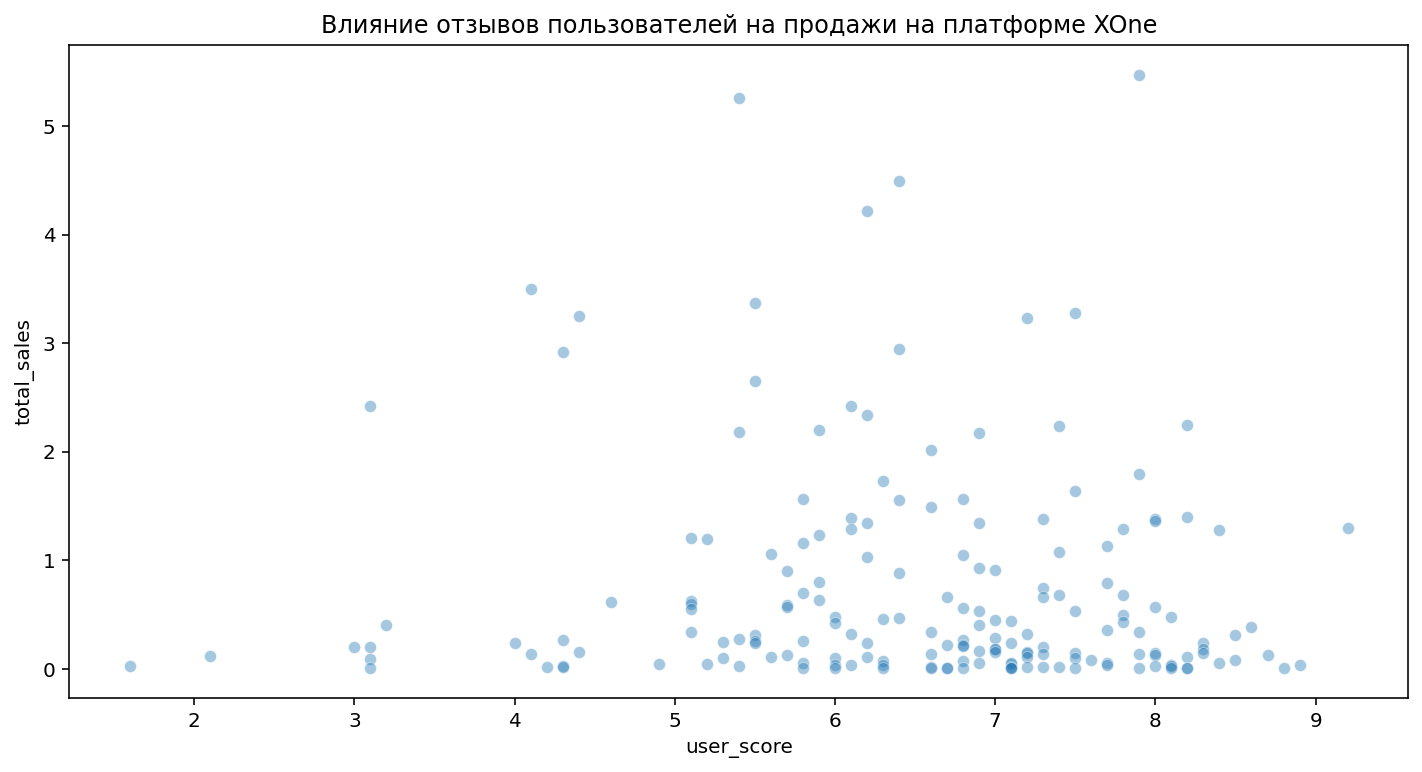

In [72]:
# Выберем одну из самых продающих платформ интересующего нас периода для анализа
# анализ влияния отзывов пользователей
df_XOne= actual_period_data[actual_period_data['platform']=='XOne']
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=df_XOne, alpha = 0.4)
plt.title('Влияние отзывов пользователей на продажи на платформе XOne')
plt.show()

In [38]:
# коэффициент корреляции Пирсона
df_XOne['user_score'].corr(df_XOne['total_sales'])

-0.06892505328279414

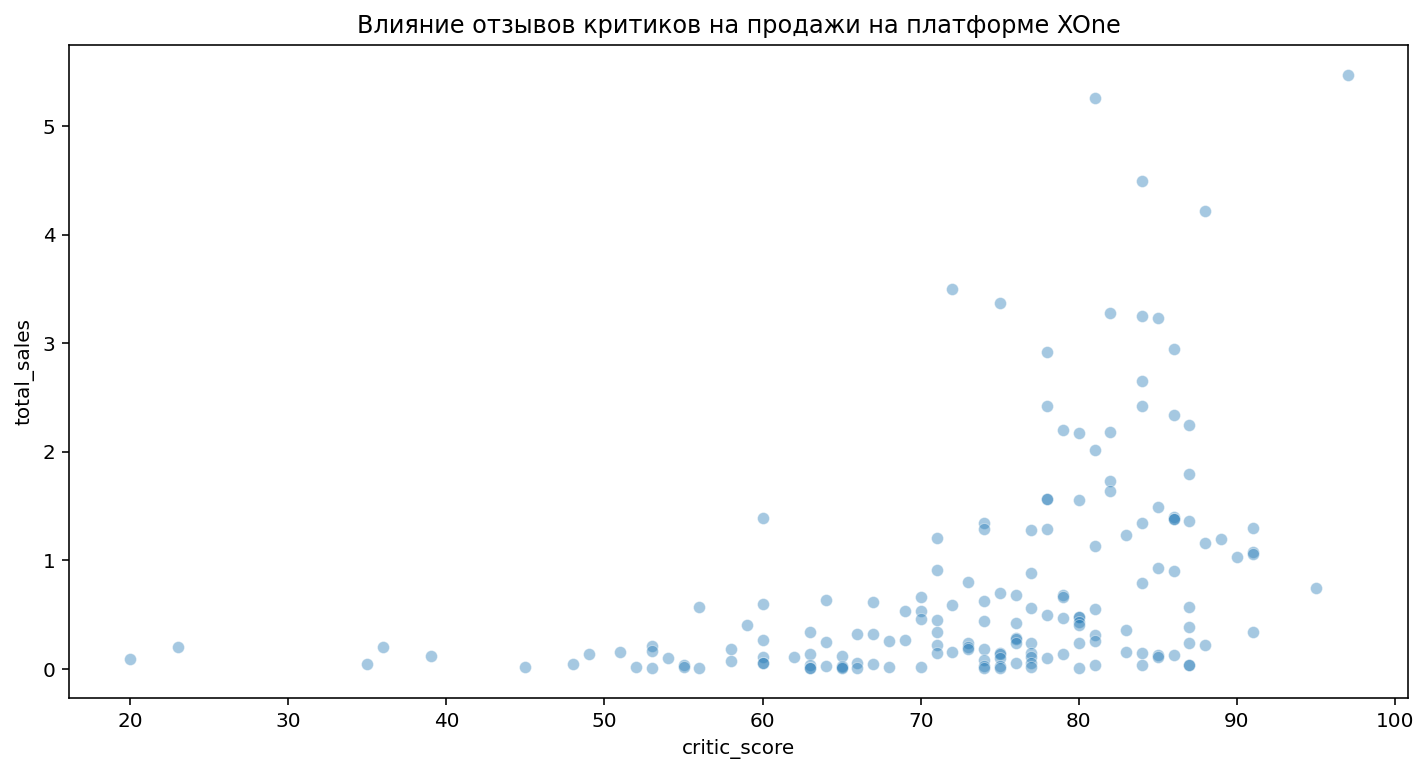

In [73]:
# анализ влияния отзывов критиков
df_XOne= actual_period_data[actual_period_data['platform']=='XOne']
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=df_XOne, alpha = 0.4)
plt.title('Влияние отзывов критиков на продажи на платформе XOne')
plt.show()

In [40]:
# коэффициент корреляции Пирсона
df_XOne['critic_score'].corr(df_XOne['total_sales'])

0.4169983280084017

Результаты анализа говорят о том, что связь между отзывами пользователей и продажами отсутствует (коэффициент Пирсона имеет отрицательное значение). Связь продаж и отзывов критиков - положительная и средней тесноты: к оценкам критиков покупатели прислушиваются.

### Смотрим влияние отзывов по другим платформам.


3DS


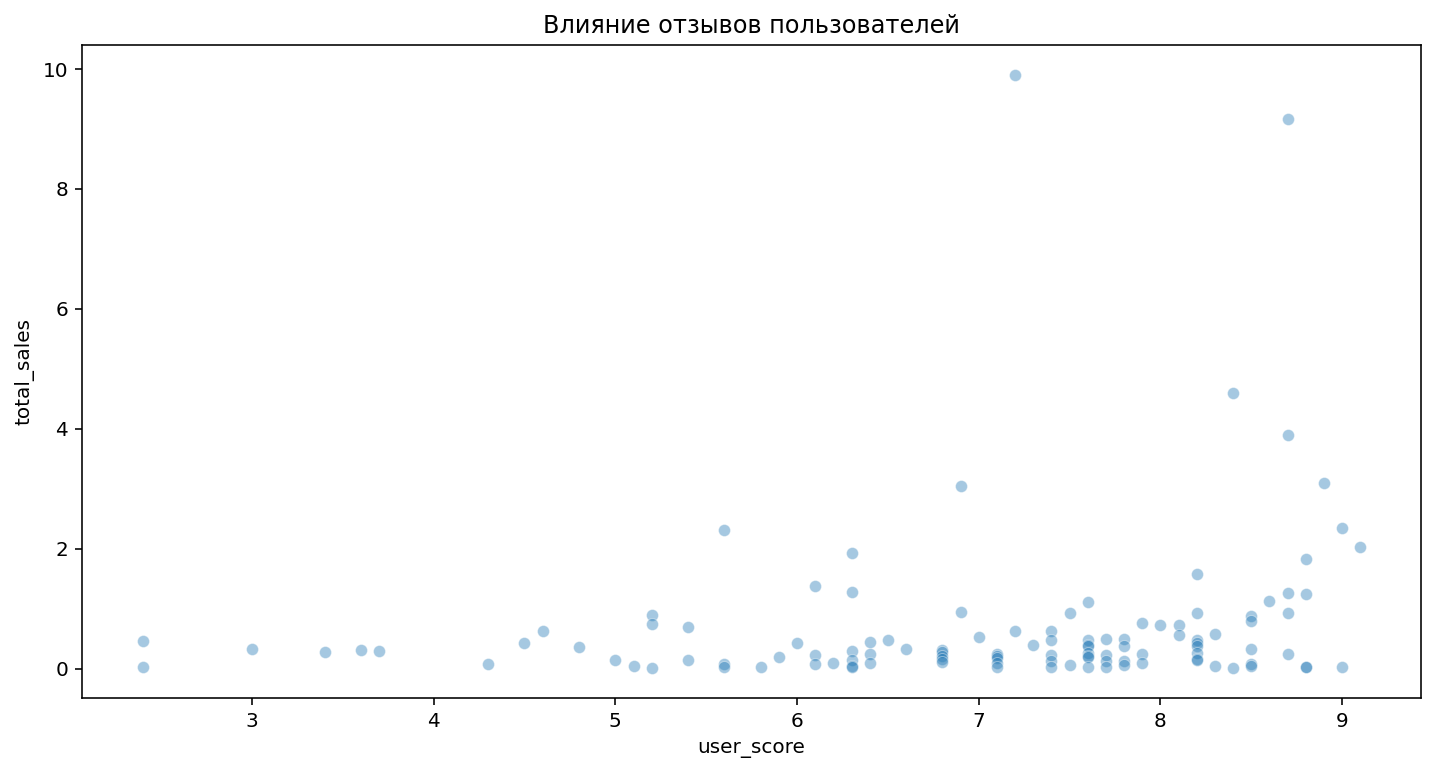

Корреляция между отзывами пользователей и продажами:  0.19758263411038599


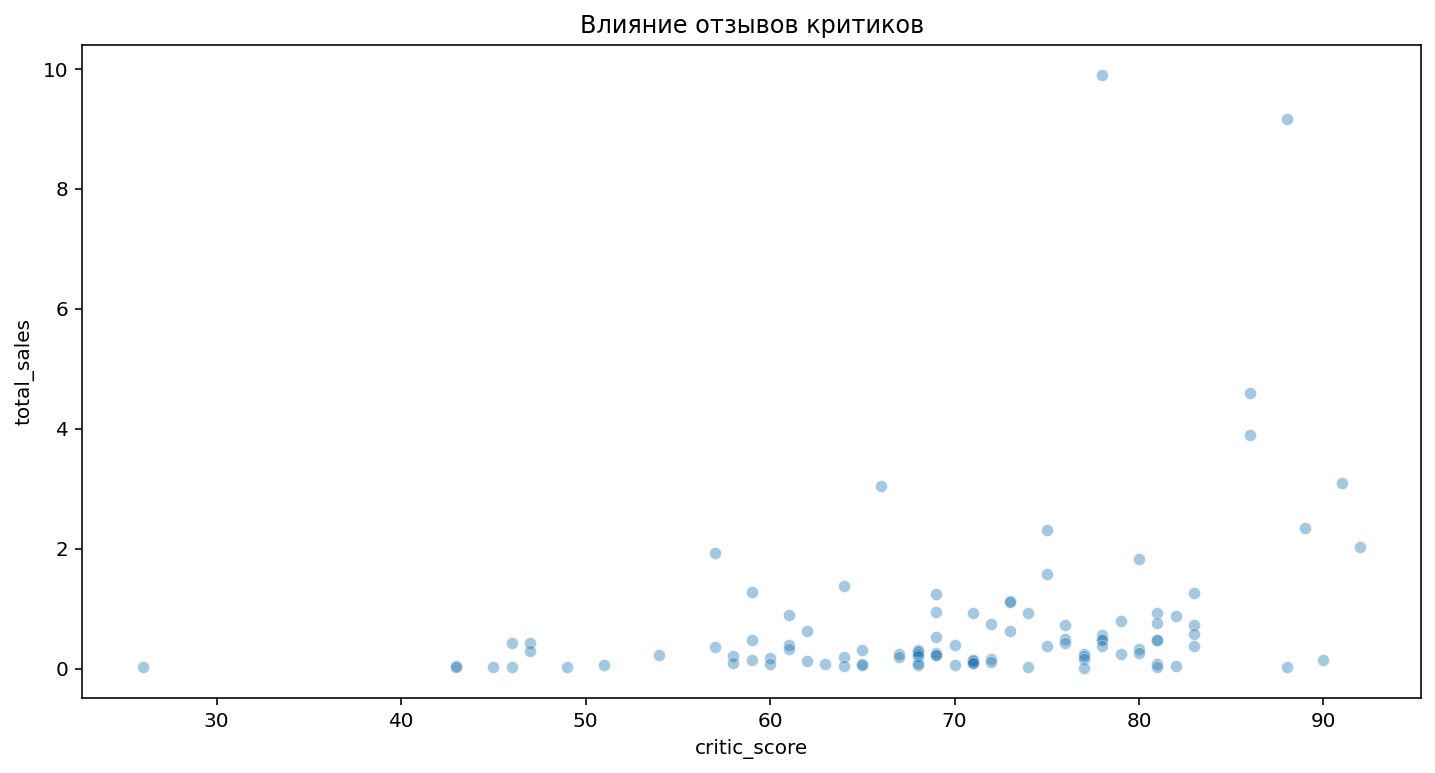

Корреляция между отзывами критиков и продажами:  0.3208028695360785

PS4


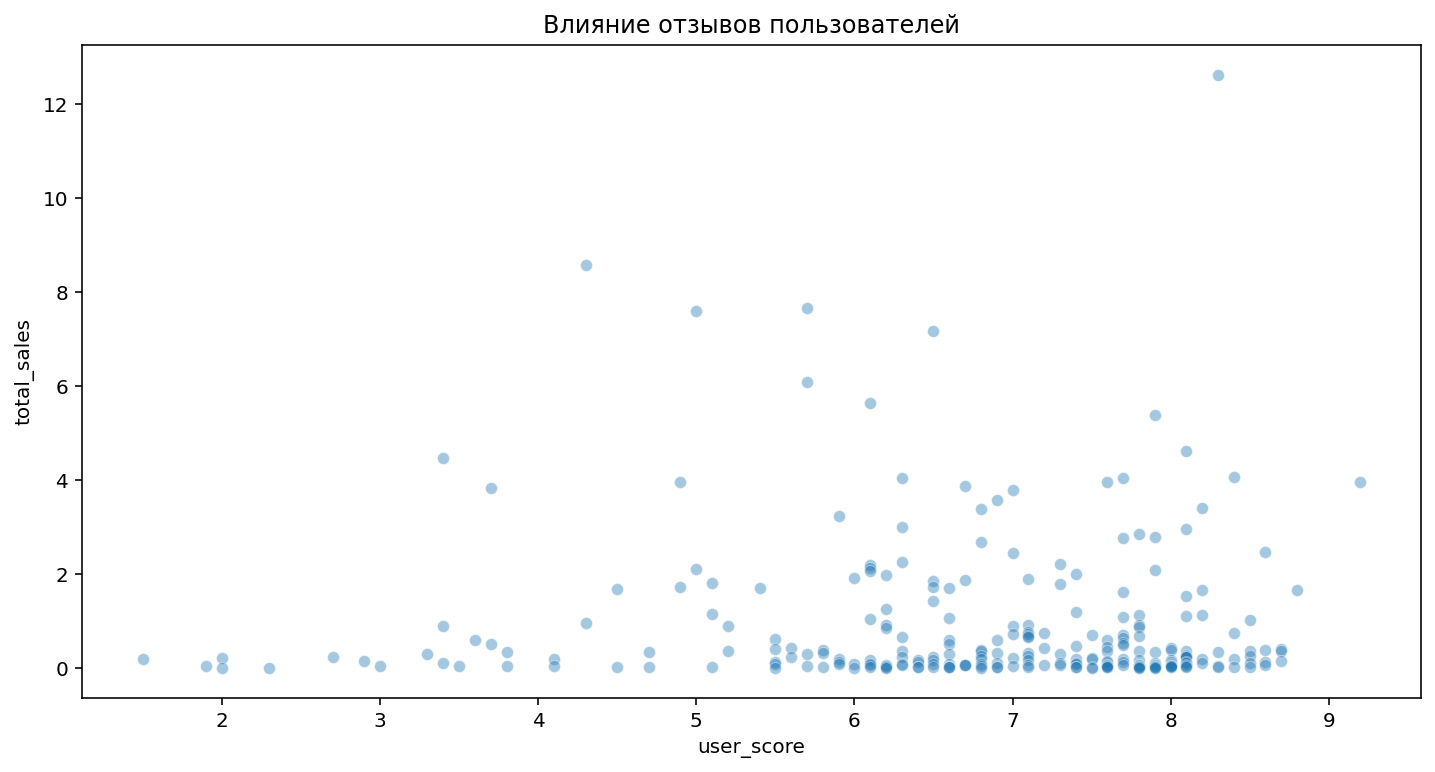

Корреляция между отзывами пользователей и продажами:  -0.031957110204556376


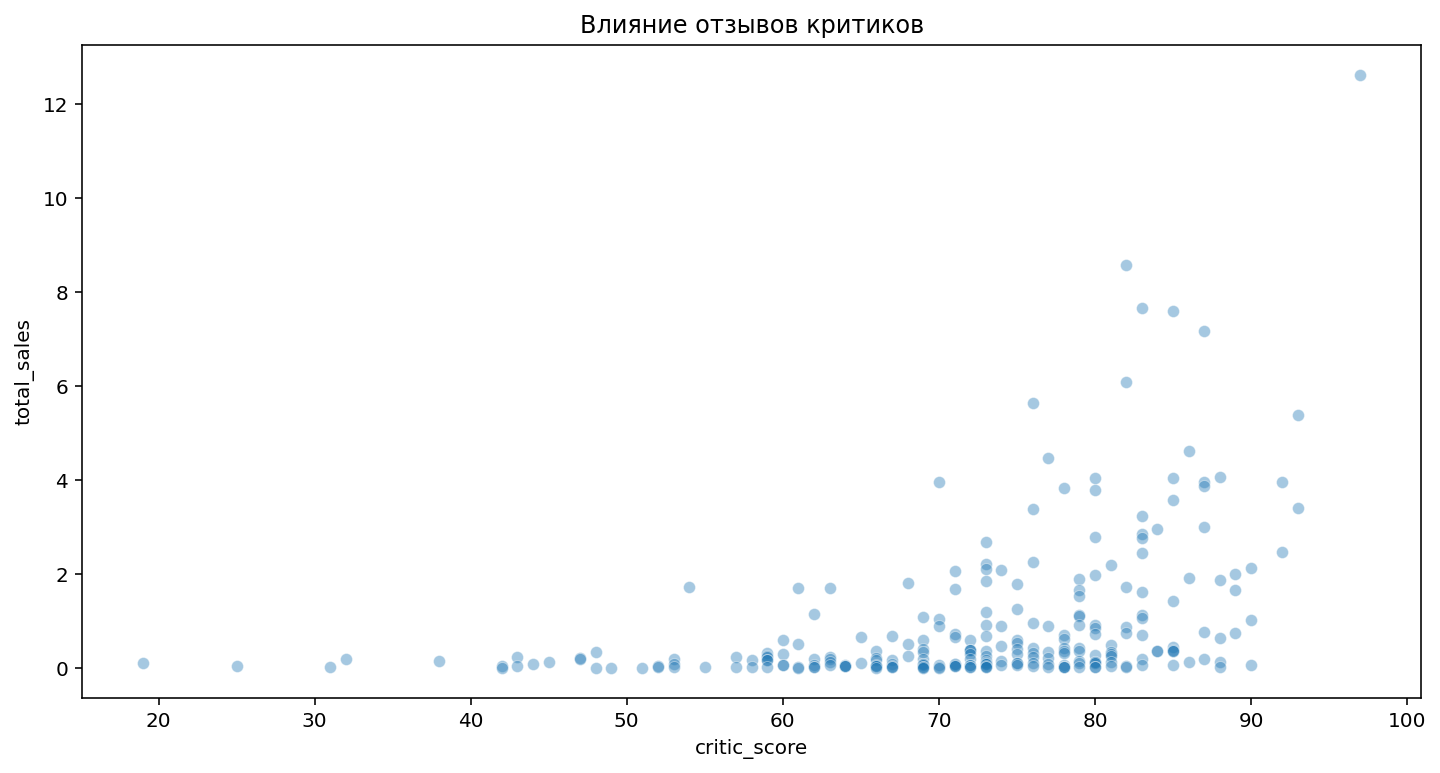

Корреляция между отзывами критиков и продажами:  0.40656790206178095

X360


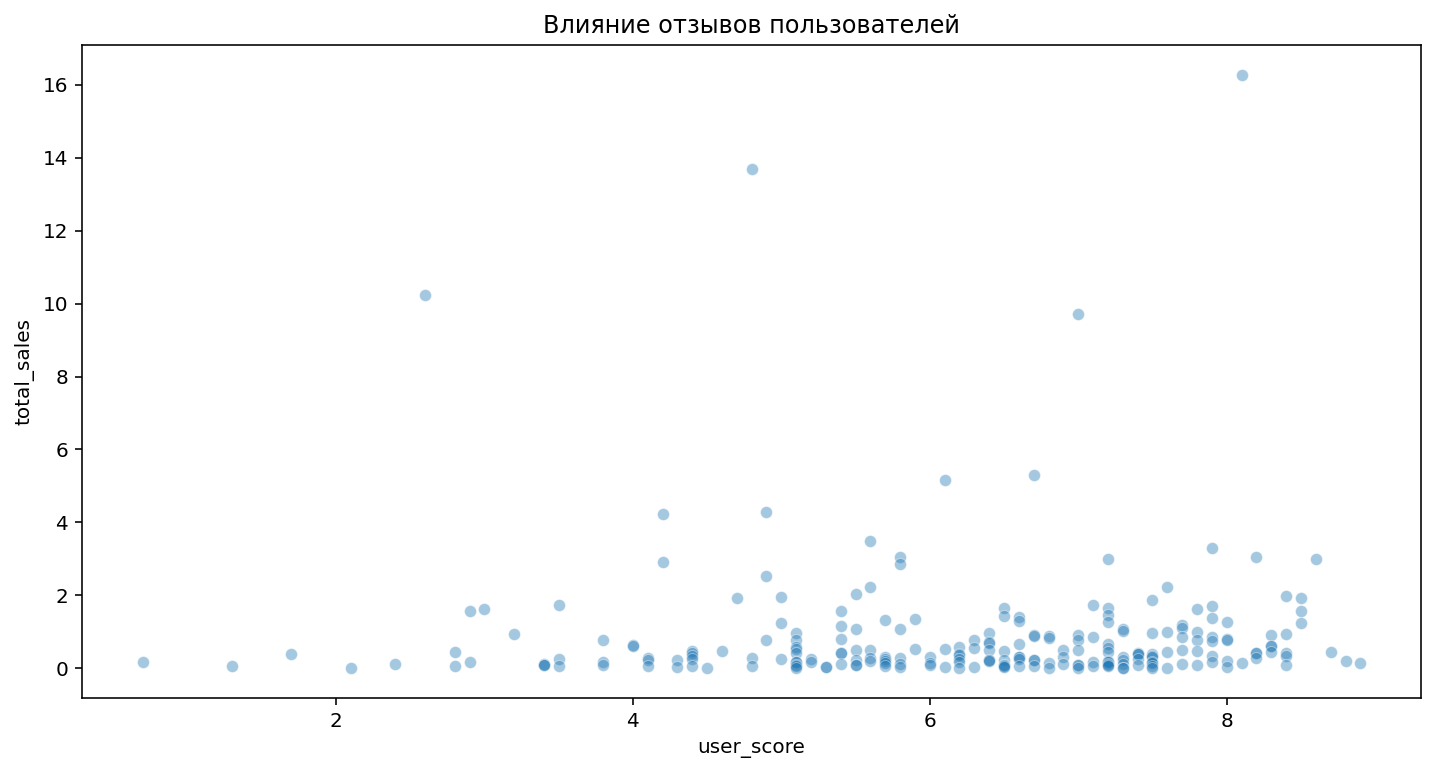

Корреляция между отзывами пользователей и продажами:  0.006163978646213326


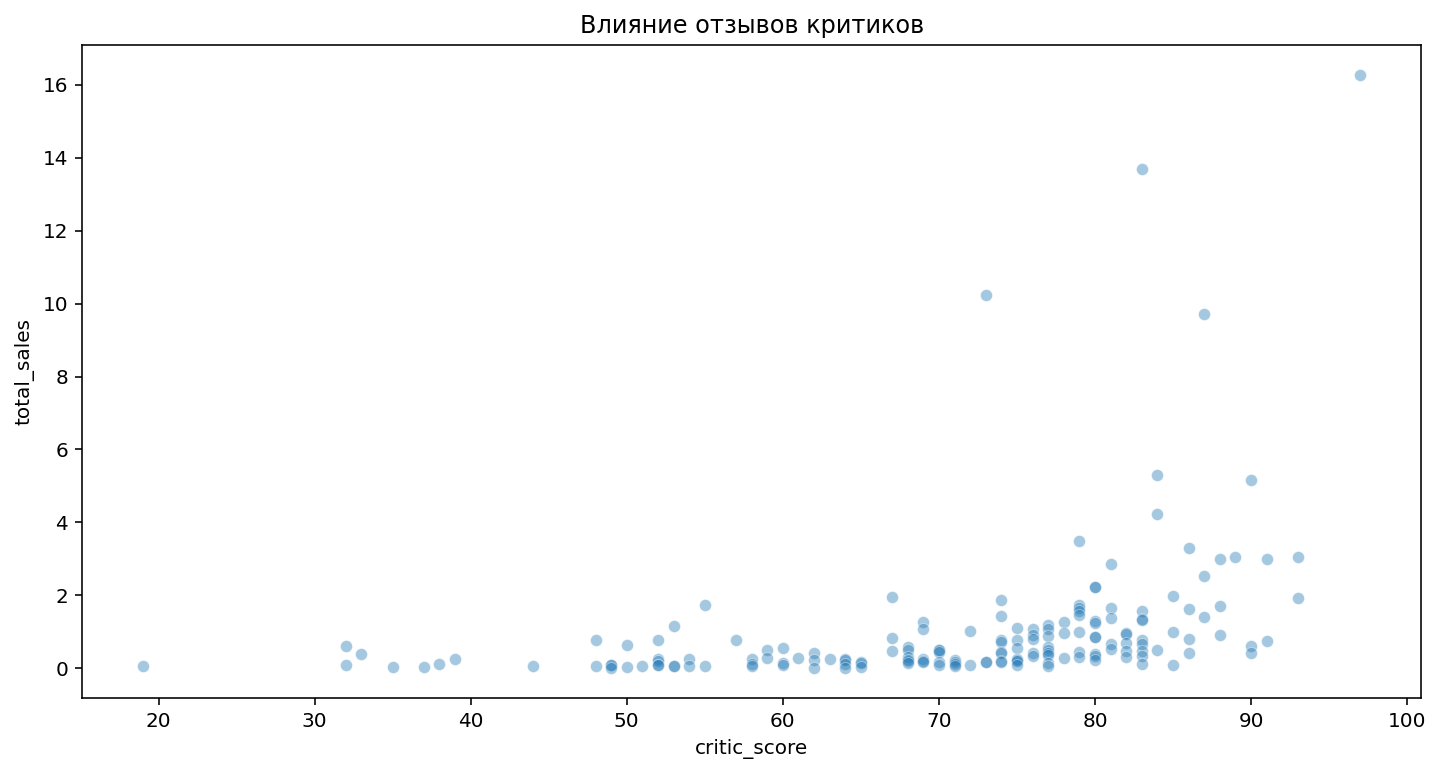

Корреляция между отзывами критиков и продажами:  0.3605734888507336

XOne


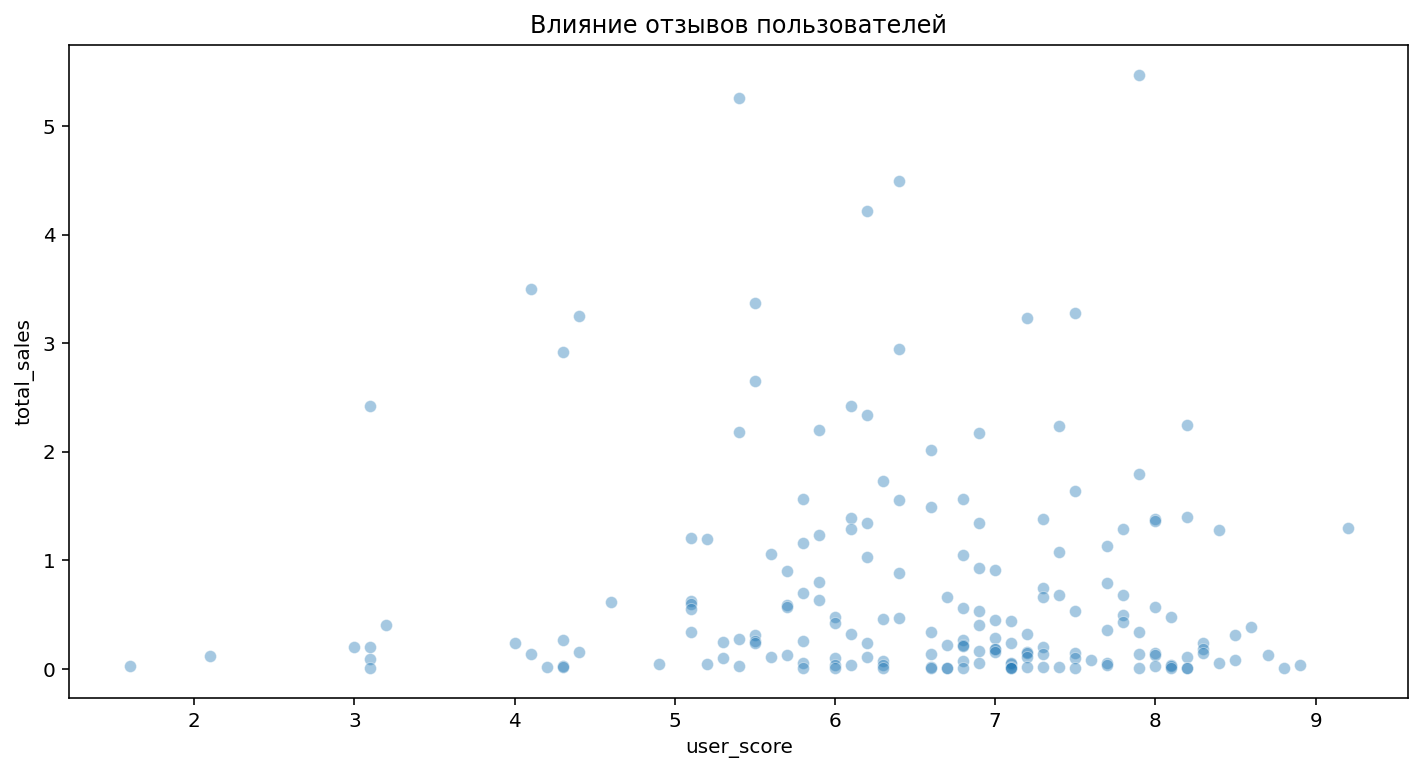

Корреляция между отзывами пользователей и продажами:  -0.06892505328279414


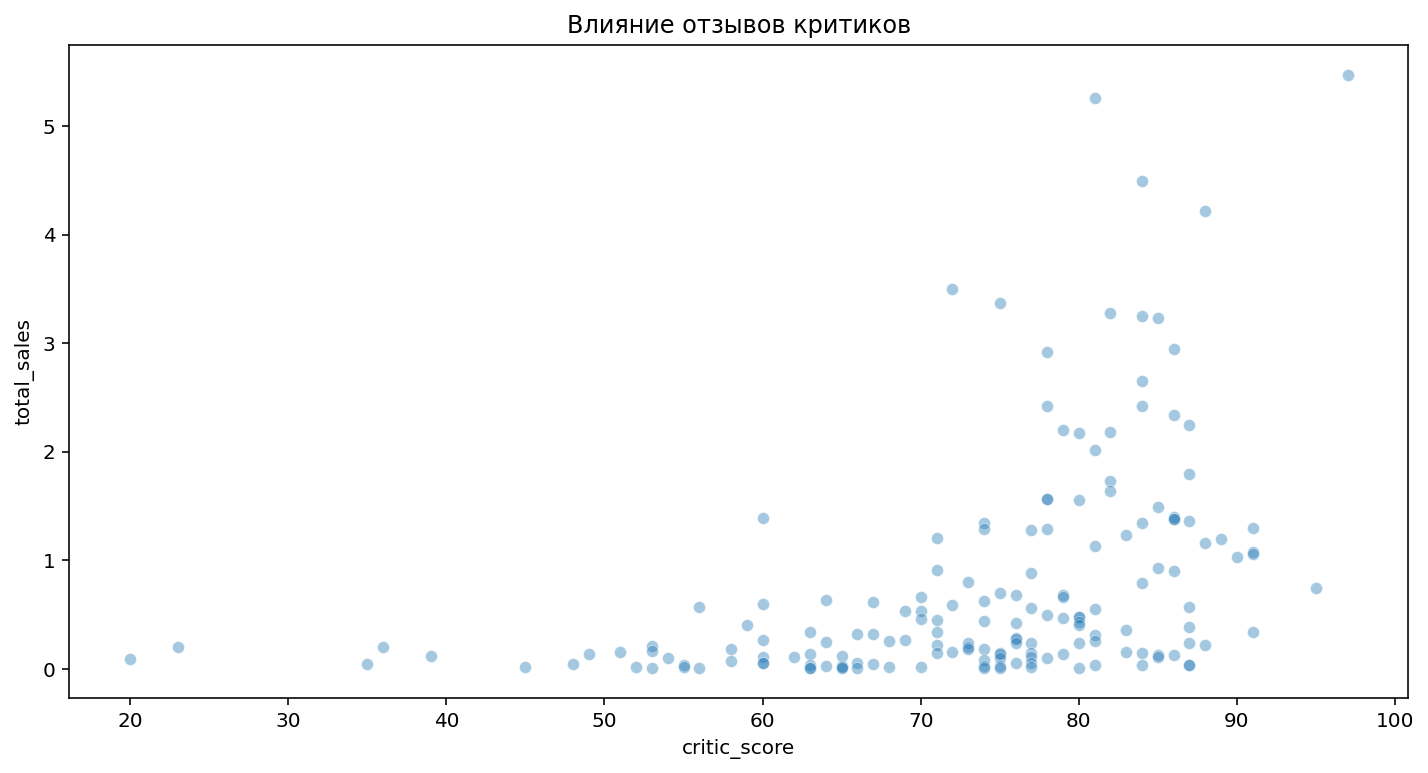

Корреляция между отзывами критиков и продажами:  0.4169983280084017

PS3


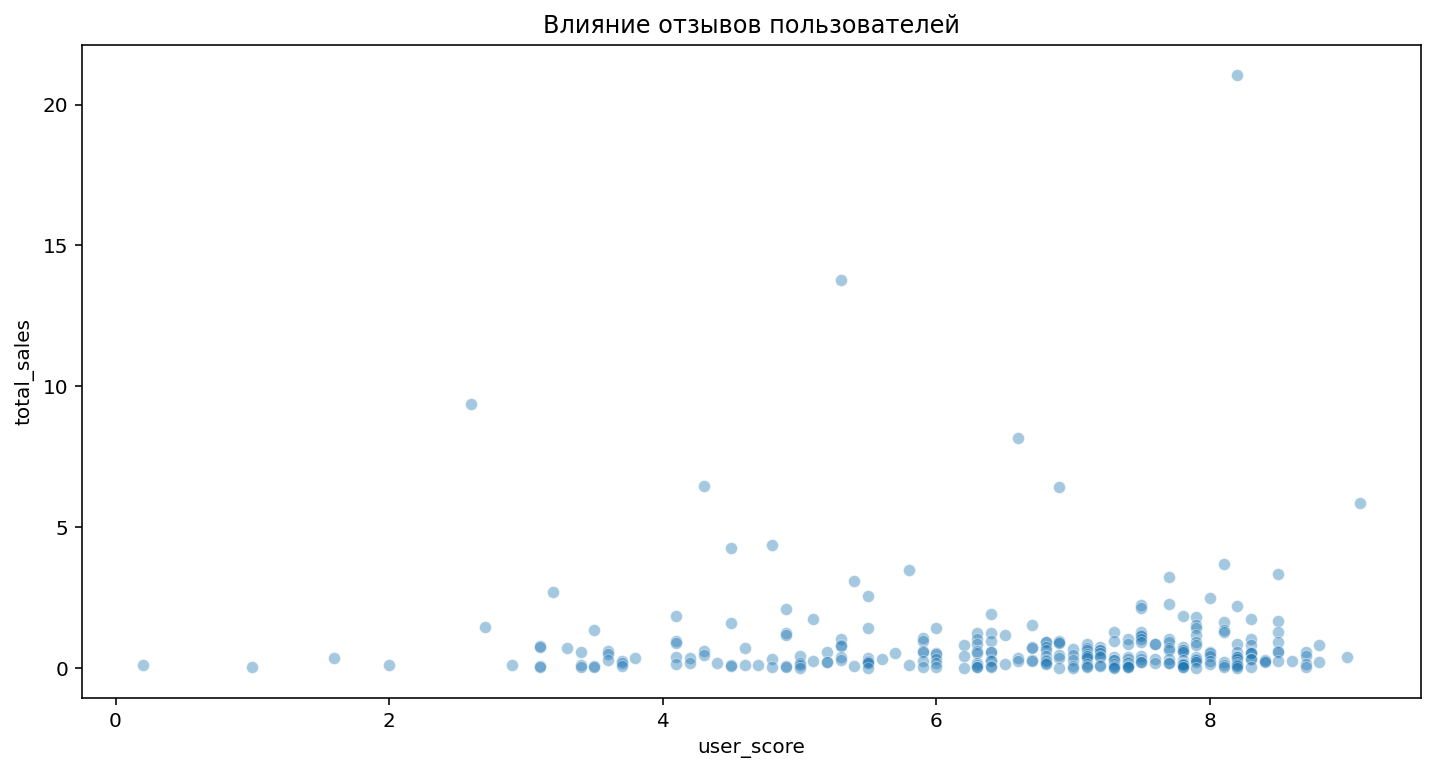

Корреляция между отзывами пользователей и продажами:  -0.005143522887113828


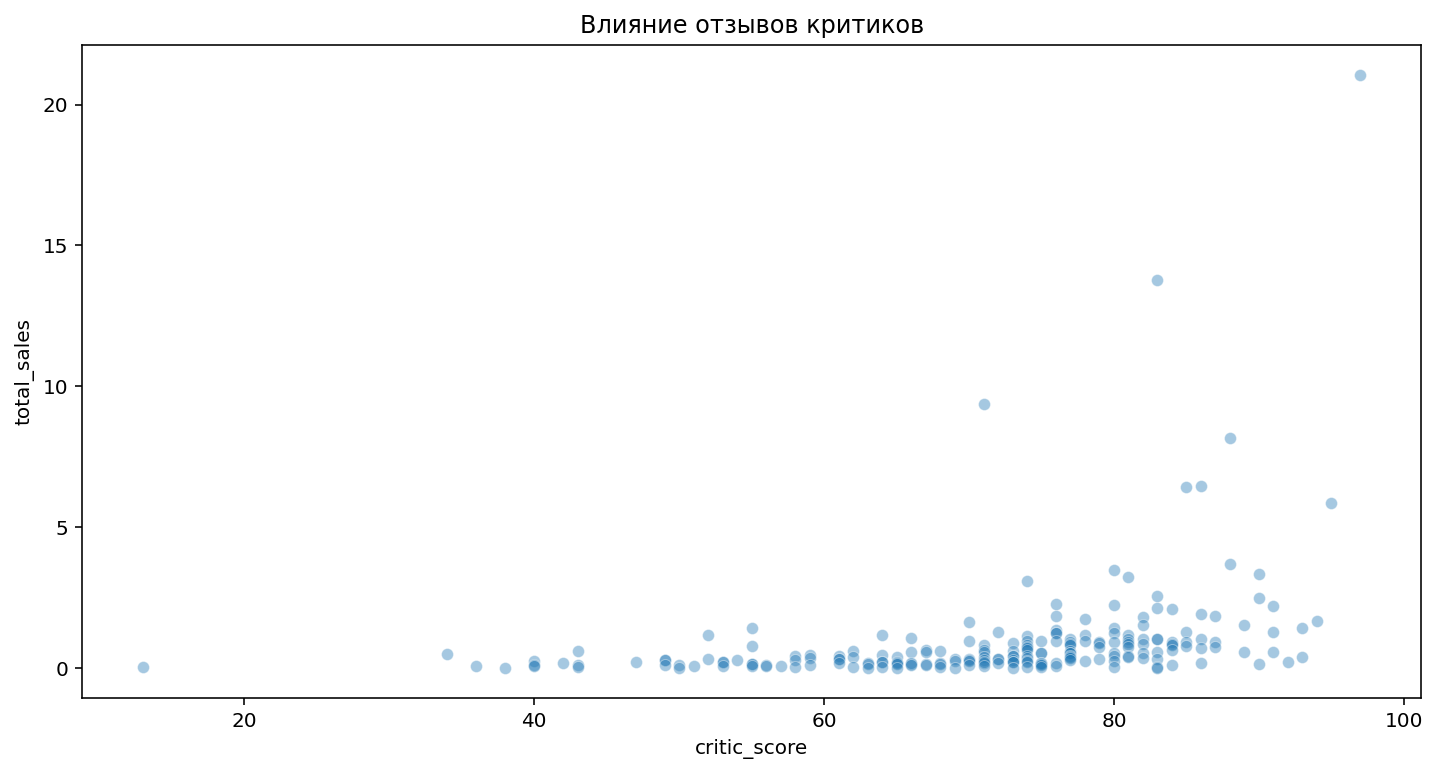

Корреляция между отзывами критиков и продажами:  0.3314972592629587


In [41]:
platforms_list = ['3DS','PS4','X360','XOne','PS3']
for platform in platforms_list:
    print()
    print(platform)
    df_XOne= actual_period_data[actual_period_data['platform']==platform]
    plt.figure(figsize=(12,6))
    sns.scatterplot(x='user_score', y='total_sales', data=df_XOne, alpha = 0.4)
    plt.title('Влияние отзывов пользователей')
    plt.show()
    print('Корреляция между отзывами пользователей и продажами: ', df_XOne['user_score'].corr(df_XOne['total_sales']))
    plt.figure(figsize=(12,6))
    sns.scatterplot(x='critic_score', y='total_sales', data=df_XOne, alpha = 0.4)
    plt.title('Влияние отзывов критиков')
    plt.show()
    print('Корреляция между отзывами критиков и продажами: ', df_XOne['critic_score'].corr(df_XOne['total_sales']))

При анализе всех пяти выделенных платформ выявлены следующие результаты:
- Платформа 3DS корреляция между отзывами пользователей и продажами - очень слабая; корреляция между отзывами критиков и продажами - слабая. 
- Платформа PS4 корреляция между отзывами пользователей и продажами - отсутствует; корреляция между отзывами критиков и продажами - слабая.
- Платформа X360 корреляция между отзывами пользователей и продажами - очень слабая; корреляция между отзывами критиков и продажами - слабая.
- Платформа XOne корреляция между отзывами пользователей и продажами - отсутствует; корреляция между отзывами критиков и продажами - слабая.
- Платформа PS3 корреляция между отзывами пользователей и продажами - отсутствует; корреляция между отзывами критиков и продажами - слабая.
-Таким образом, на всех пяти платформах коэффициенты корреляции между отзывами пользователей и продажами похожи: зависимость продаж от отзывов пользователей - очень слабая или отсутствует.
Связь между отзывами критиков и продажами на всех пяти платформах - слабая. К мнению критиков пользователи прислушиваются, но слабо. Мнение пользователей на продажи не влияет или влияет очень слабо.

### Анализируем общее распределение игр по жанрам.

In [42]:
# Методом сводных таблиц отсортируем по убыванию продажи игр по жанрам 
df_new = df.pivot_table(
    index='genre', values='total_sales', aggfunc='sum'
).sort_values(by='total_sales', ascending=False)
df_new = df_new.reset_index().rename_axis(None, axis=1)
df_new

,genre,total_sales
0,Action,1716.52
1,Sports,1309.67
2,Shooter,1041.36
3,Role-Playing,931.08
4,Platform,825.55
5,Misc,790.29
6,Racing,723.49
7,Fighting,442.66
8,Simulation,387.96
9,Puzzle,239.89


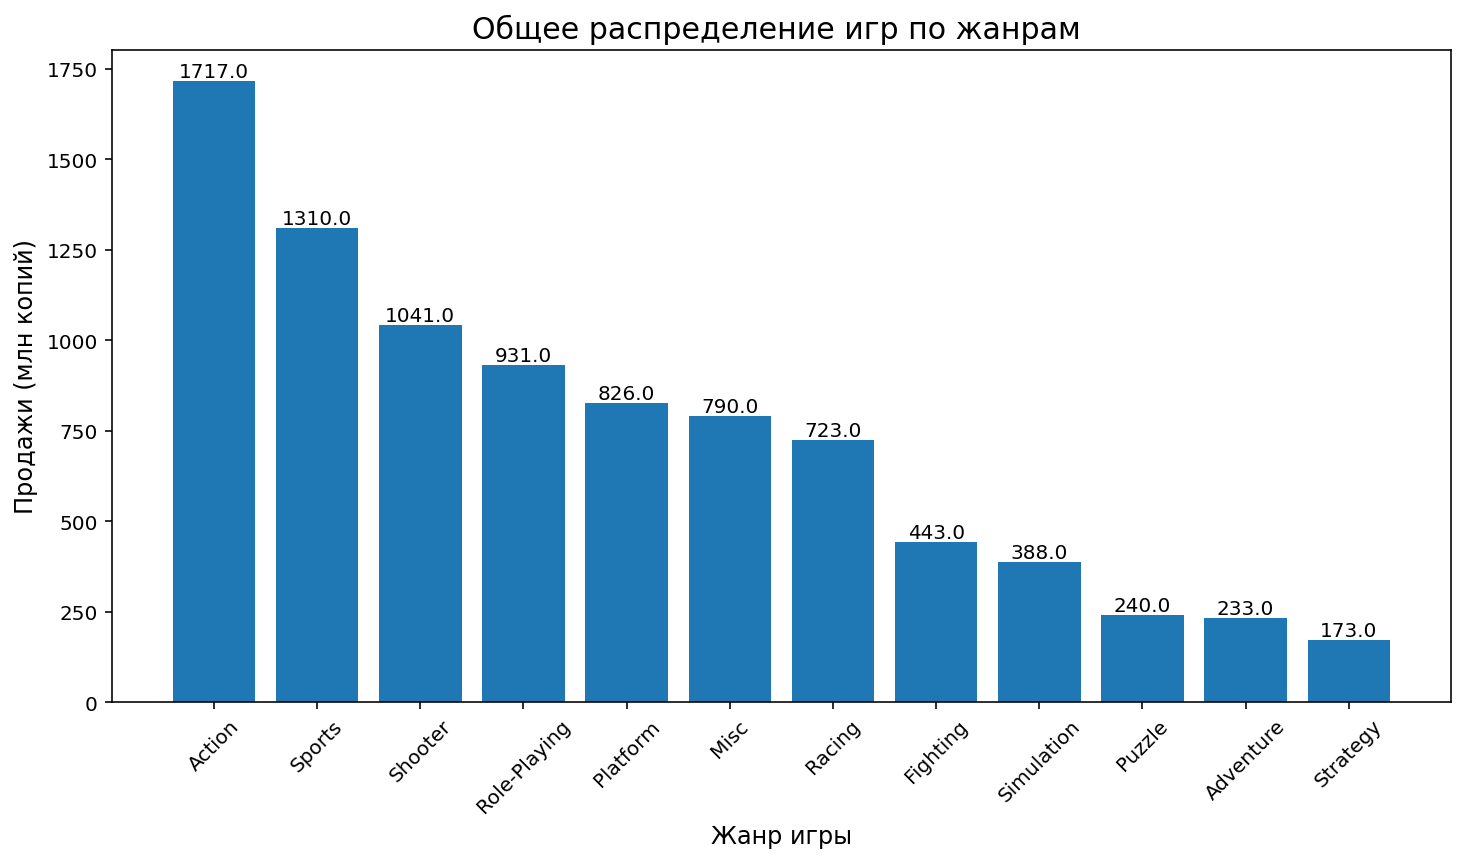

In [43]:
# Нарисуем диаграмму продаж игровых копий по жанрам
plt.figure(figsize=(12,6))
plt.title('Общее распределение игр по жанрам ',fontsize=15)
sns.barplot(data=df_new, x='genre', y='total_sales')
plt.xlabel('Жанр игры',fontsize=12)
plt.ylabel('Продажи (млн копий)',fontsize=12)
plt.xticks(rotation = 45)
a = plt.bar(df_new['genre'], df_new['total_sales'])
for rect, label in zip(a.patches, df_new['total_sales'].round()):
    plt.text(
        rect.get_x() + rect.get_width() / 2, # координата X: центр столбца определяем как начало столбца + половина его ширины
        rect.get_height(), # координата Y: высота столбца
        label,
        ha="center",
        va="bottom"
    )
plt.show()

На графике явно видно, что в общем распределении лидируют в продажах игры жаноров Action, Sports и Shooter. Игры жанра Strategy занимают в продажах самое последнее место. Стоит посмотреть на разницу в распределении популярности жанров игр по регионам и по средним значениям.

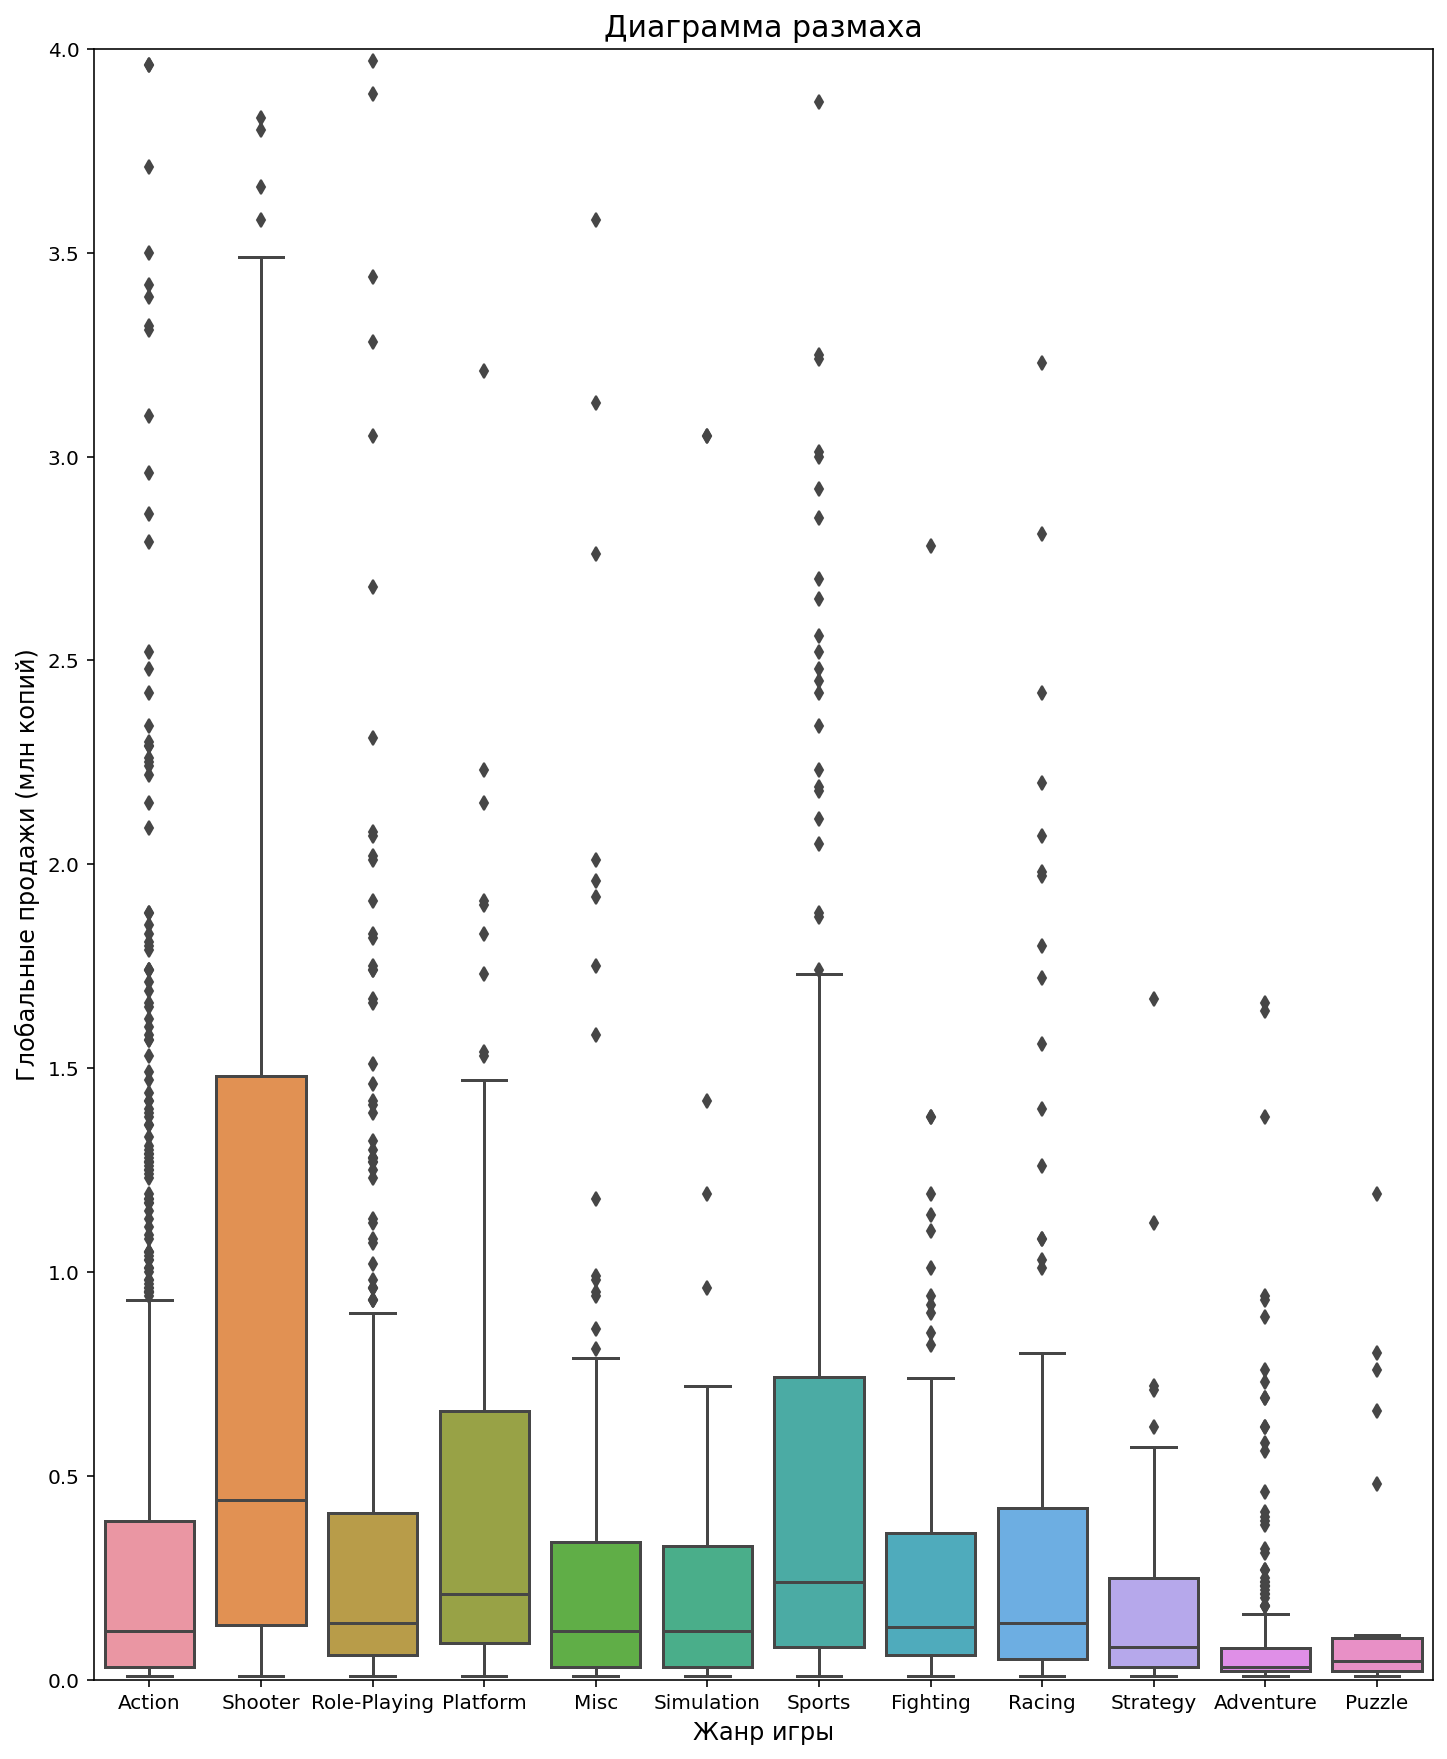

In [44]:
plt.figure(figsize=(12,15))
sns.boxplot(x='genre', y='total_sales', data=actual_period_data)
plt.ylim([0,4])
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Жанр игры', fontsize=12)
plt.ylabel('Глобальные продажи (млн копий)',fontsize=12)
plt.show()

Диаграмма размаха показывает, что самые стабильные продажи демонстрирует жанр Sooter, за ним следует жанр Sports и жанр Platform. Жанр Action вышел на лидирующие позиции благодаря большому количеству успешных хорошо продаваемых игр, которые на диаграмме размаха видны как выбросы.  Также мы видим, что стратегии занимают не последнее место. На последнем месте пазлы и приключения. Неразумно в бизнесе опираться на единичные успешные релизы. Гораздо важнее сделать ставку на стабильно продающиеся жанры игр с устойчивым спросом пользователей.

### Общий вывод по разделу.
- Ситуация на рынке продажи консольных игр за последние 40 лет очень изменилась. Период серьёзных изменений в этой индустрии составляет примерно 5 лет (на примере существования лидирующих на рынке платформ: 5-6 лет продажи растут, затем примерно такой же период - снижаются).
- На момент начала 2017 года потенциально прибыльными являлись платформы 3DS, PS3, PS4, X360, XOne. На момент окончания 2016 года отсутствуют растущие платформы. Продажи перечисленных платформ идут на спад. (Медианы продаж у всех пяти платформ смещены в сторону минимальных значений).
- Влияние отзывов пользователей и критиков отобранных для анализа платформ на продажи по всем пяти платформам имеет общие черты: влияние отзывов пользователей - очень слабое или отсутствует, влияние отзывов критиков - слабое. К мнению критиков пользователи прислушиваются,но слабо. мнение пользователей на продажи не влияет.
- Лидируют в продажах игры жаноров Action, Sports и Shooter. Игры жанра Strategy занимают в продажах самое последнее место. Но это на первый взгляд. При более детальном рассмотрении видно, что самые стабильные продажи игровых копий у жанра Sooter, жанр Sports удерживает и здесь второе место. и самое последнее место не за стратегиями, а за пазлами и приключениями. Очень важно посмотреть на распределение популярных жанров по регионам.

## Составим портрет пользователя каждого региона.

Определим для пользователей каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5);
- самые популярные жанры (топ-5);
- степень влияния рейтинга ESRB на продажи в отдельном регионе; учтём, что рейтинг ESRB создан для Северной америки, канады и Мексики.Вазиатских странах есть свой рейтинг.Посмотрим, есть ли влияние этого рейтинга в Японии.
- Анализировать предпочтения будем в актуальном периоде (с 2012 года), поскольку ситуация на рынке консольных игр серьёзно меняется с периодичностью в 5 лет. 

### Самые популярные платформы по регионам Северная Америка, Япония и Европа. Сравнение долей рынка.

In [74]:
colors = sns.color_palette('rocket')[ 1:5 ]

In [46]:
# Напишем функцию поиска выбранных параметров (платформа, жанр и рейтинг) 
# в каждом регионе для определения их долей на рынке
    # data - датафрейм
    # region - регион
    # search - параметр для поиска
    # colors - цвет диаграммы
            # 'platform' - по платформам
            # 'genre' - по жанру
            # 'rating' - по рейтингу
            
def define_the_region(data, region, search):
    if search == 'platform': 
        # формируем сводную таблицу суммарных продаж платформ для региона
        temp = data.pivot_table(index='platform',
                                values=region,
                                aggfunc='sum')
    
        # находим сумму всех продаж для выбранного региона
        sum_sales = temp[region].sum()
    
        # находим долю каждой платформы
        temp['part'] = temp[region] / sum_sales
    
        return temp.sort_values(region, ascending=False).head()
    elif search == 'genre':
        
        # формируем сводную таблицу продаж популярных жанров для региона
        temp = data.pivot_table(index='genre',
                                values=region,
                                aggfunc='sum')
    
        # находим сумму всех продаж для региона
        sum_sales = temp[region].sum()
    
        # находим долю каждой платформы
        temp['part'] = temp[region] / sum_sales
    
        return temp.sort_values(region, ascending=False).head()
    
    else:
        
        # формируем сводную таблицу со средними продажами игр по рейтингу ESRB
        return data.pivot_table(index='rating',
                                values=region,
                                aggfunc='mean').sort_values(region, ascending=False)
    

In [47]:
#Создадим сводную таблицу для региона
na = define_the_region(actual_period_data, 'na_sales', 'platform')
na

,na_sales,part
platform,,
X360,140.05,0.236983
PS4,108.74,0.184003
PS3,103.38,0.174933
XOne,93.12,0.157571
3DS,55.31,0.093592


In [48]:
import warnings #импортируем библиотеку

warnings.filterwarnings('ignore') # отключаем предупреждения

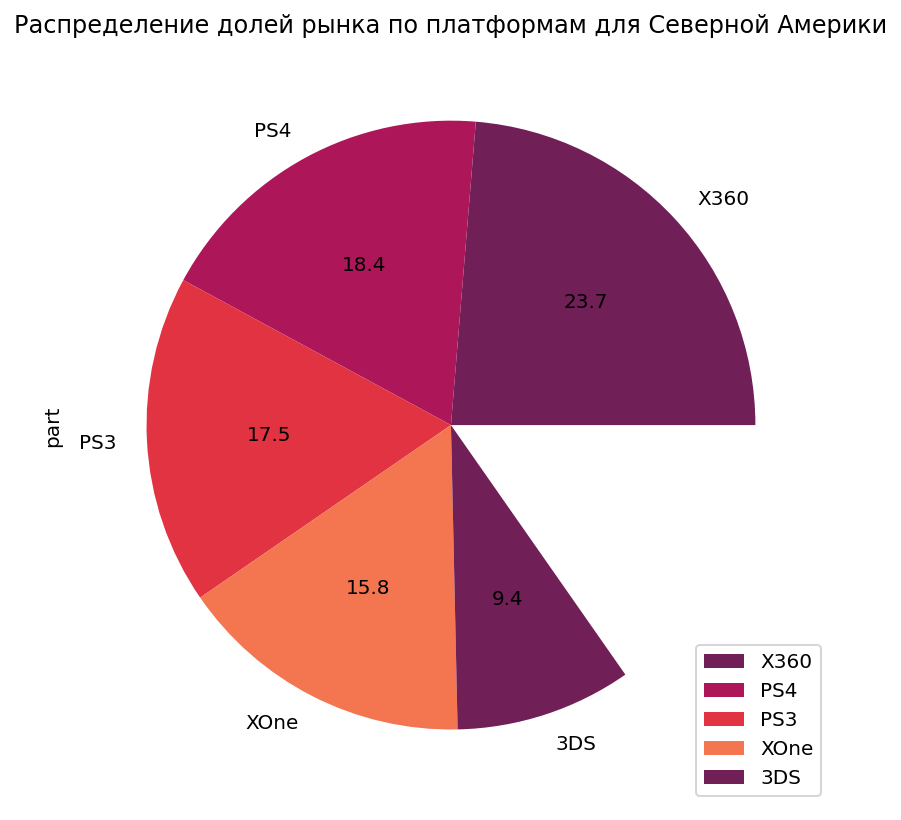

In [49]:
na.plot(
    kind='pie', y='part'
    , title='Распределение долей рынка по платформам для Северной Америки'
    , figsize=(7, 7),autopct='%1.1f', colors=colors
);


Распределение долей рынка для Северной Америки по 5 самым популярным платформам следующее: на платформы PS3, PS4 и XOne приходятся примерно одинаковые доли рынка: по 17,5 %, 18,4% и 15,8% соответственно. Платформа 3DS удерживает - 9,4% рынка. Самая большая доля - 23,7% приходится на платформу Х360.

In [50]:
#Создадим сводную таблицу для региона
eu = define_the_region(actual_period_data, 'eu_sales', 'platform')
eu

,eu_sales,part
platform,,
PS4,141.09,0.278383
PS3,106.86,0.210844
X360,74.52,0.147034
XOne,51.59,0.101792
3DS,42.64,0.084132


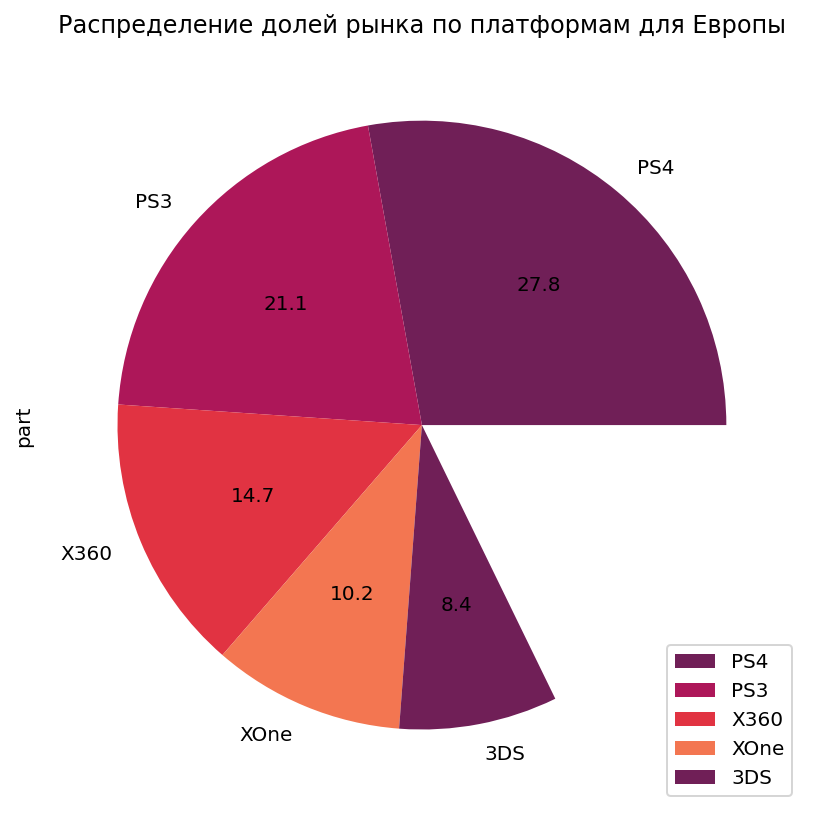

In [51]:
eu.plot(
    kind='pie', y='part'
    , title='Распределение долей рынка по платформам для Европы'
    , figsize=(7, 7),autopct='%1.1f', colors=colors
);

Самыми популярными в Европе являются те же игровые консоли, что и в Америке. Распределение долей рынка между ними в Европе - несколько иное: лидеры рынка платформы PS3 и PS4 удерживают практически половину рынка (21,1% и 27,8% соответственно).На долю американского лидера - платформы Х360 в Европе приходится 14,7% рынка.  XOne и 3DS завершают список лидеров рынка. На долю этих платформ приходится 10,2% и 8,4% соответственно.

In [52]:
#Создадим сводную таблицу для региона
jp = define_the_region(actual_period_data, 'jp_sales', 'platform')
jp

,jp_sales,part
platform,,
3DS,87.79,0.455862
PS3,35.29,0.183249
PSV,21.04,0.109253
PS4,15.96,0.082875
WiiU,13.01,0.067556


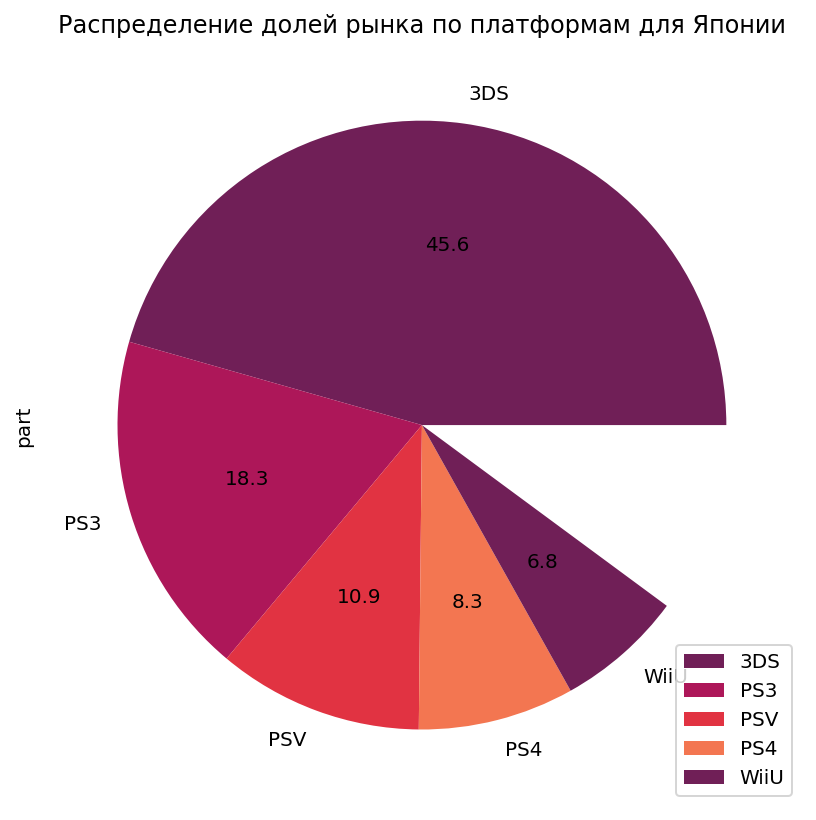

In [53]:
jp.plot(
    kind='pie', y='part'
    , title='Распределение долей рынка по платформам для Японии'
    , figsize=(7, 7),autopct='%1.1f', colors=colors
);

Распределение долей рынка для Японии сильно отличается от распреджеления для Америки и Европы: безусдлвным лодером здесь является платформаплатформа 3DS. За ней - 45,6% рынка.Также присутствуют платформы PS3 и PS4 (18,3% и 8,3% долей рынка соответственно). Здесь среди лидеров есть платформы PSV (10,4% рынка) и WiiU (6,8% рынка).В Европе и Америке эти платформы в лидирующих не представлены.

### Распределение долей рынка для жанров компьютерных игр по регионам Северная Америка, Япония и Европа.

In [54]:
#Создадим сводную таблицу для региона
na_genre = define_the_region(actual_period_data, 'na_sales', 'genre')
na_genre

,na_sales,part
genre,,
Action,177.84,0.300929
Shooter,144.77,0.244970
Sports,81.53,0.137960
Role-Playing,64.00,0.108297
Misc,38.19,0.064623


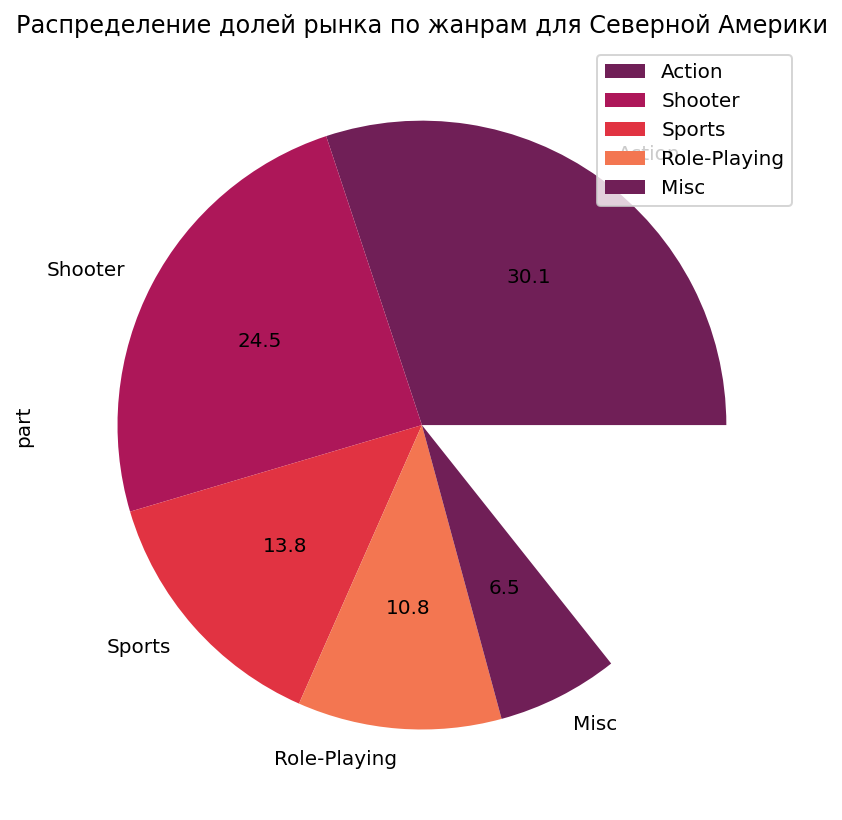

In [55]:
na_genre.plot(
    kind='pie', y='part'
    , title='Распределение долей рынка по жанрам для Северной Америки'
    , figsize=(7, 7),autopct='%1.1f', colors=colors
);

Предпочтения пользователей по жанрам в Северной Америке следующие: самый популярный жанр Action - 30,1%, следующий по популярности жанр - Shooter 24,5%, затем следует жанр Sports - 13,8%, на жанр Role-Playing приходится 10,8 %.И завершиают список игры жанра Misk - 6,5%/

In [56]:
#Создадим сводную таблицу для региона
eu_genre = define_the_region(actual_period_data, 'eu_sales', 'genre')
eu_genre

,eu_sales,part
genre,,
Action,159.34,0.314392
Shooter,113.47,0.223886
Sports,69.09,0.136321
Role-Playing,48.53,0.095754
Racing,27.29,0.053846


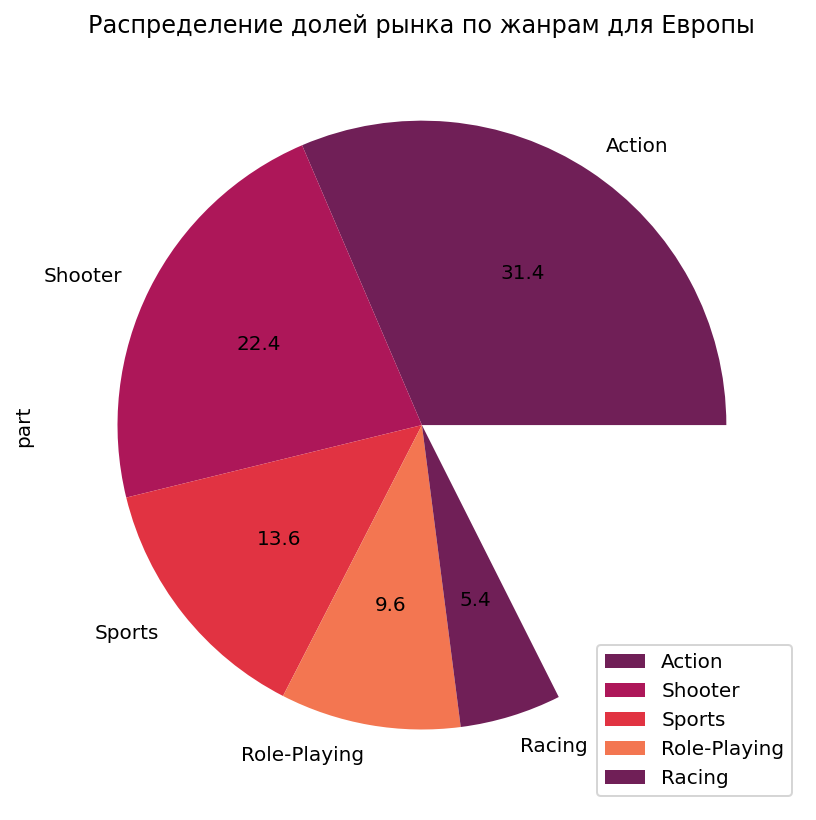

In [57]:
eu_genre.plot(
    kind='pie', y='part'
    , title='Распределение долей рынка по жанрам для Европы'
    , figsize=(7, 7),autopct='%1.1f', colors=colors
);

Жанровые предпочтения пользователей Европы практически не отличаются от американских: жанры и процентное отношение  практически одинаковые по первым четырём позициям. На пятой позиции в Европе игры жанра Racing (5,4%).

In [58]:
#Создадим сводную таблицу для региона
jp_genre = define_the_region(actual_period_data, 'jp_sales', 'genre')
jp_genre

,jp_sales,part
genre,,
Role-Playing,65.44,0.339807
Action,52.80,0.274172
Misc,12.86,0.066777
Simulation,10.41,0.054055
Fighting,9.44,0.049019


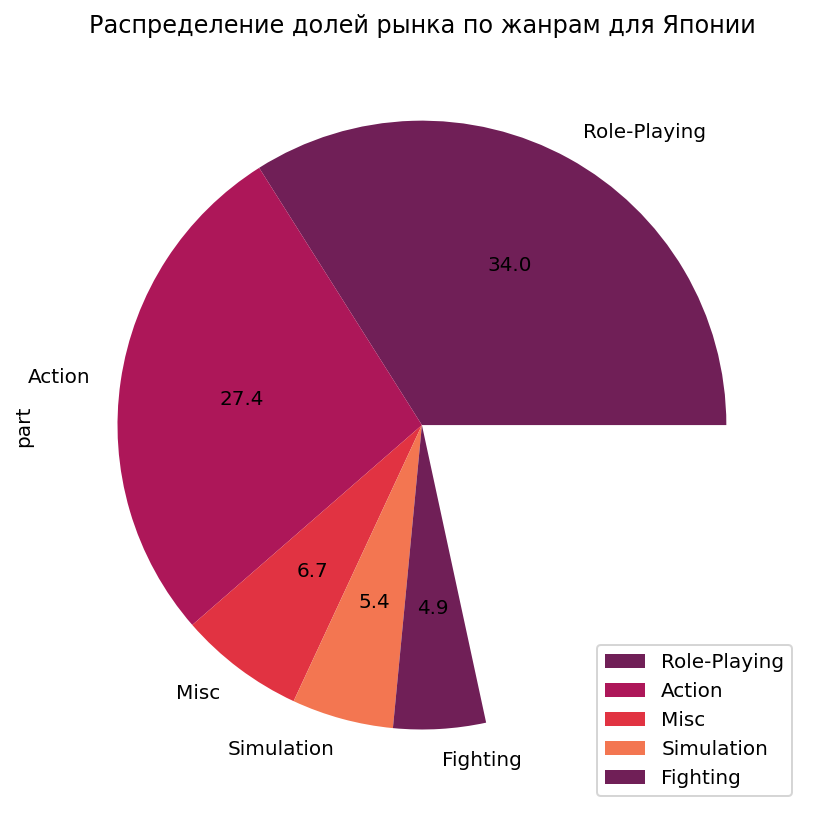

In [59]:
jp_genre.plot(
    kind='pie', y='part'
    , title='Распределение долей рынка по жанрам для Японии'
    , figsize=(7, 7),autopct='%1.1f', colors=colors
);

Распределение жанровых предпочтений в Японии значительно отличаются от европейских иамериканских: 34,0% приходится на игры жанра Role-Playing, игры жанра Action идут на втором месте и составляют 27,4%.Присутствуют жанры, которых нет в лидерах у американцев и европейцев - Fighting, Misc и Simulation (4,9%, 6,7% и 5.4% соответственно).Жанры Sports и Shooter среди лидирующих в азиатском регионе не представлены вообще.

### Посмотрим влияние рейтинга ESRB на продажи консольных игр по регионам Северная Америка, Япония и Европа.

In [60]:
# формируем сводную таблицу, считаем средние продажи для рейтинга ESRB в каждом регионе
v_r = define_the_region(actual_period_data, 
                           ['na_sales', 'eu_sales', 'jp_sales'], 
                           'raiting')[['na_sales', 'eu_sales', 'jp_sales']]
v_r.columns = ['north_america', 'europe', 'japan'] 

In [61]:
v_r

,north_america,europe,japan
rating,,,
M,0.465000,0.389478,0.042570
E,0.289544,0.286152,0.071722
E10+,0.247386,0.180948,0.026765
T,0.160243,0.128544,0.063155
no_ESRB,0.081027,0.071765,0.085365


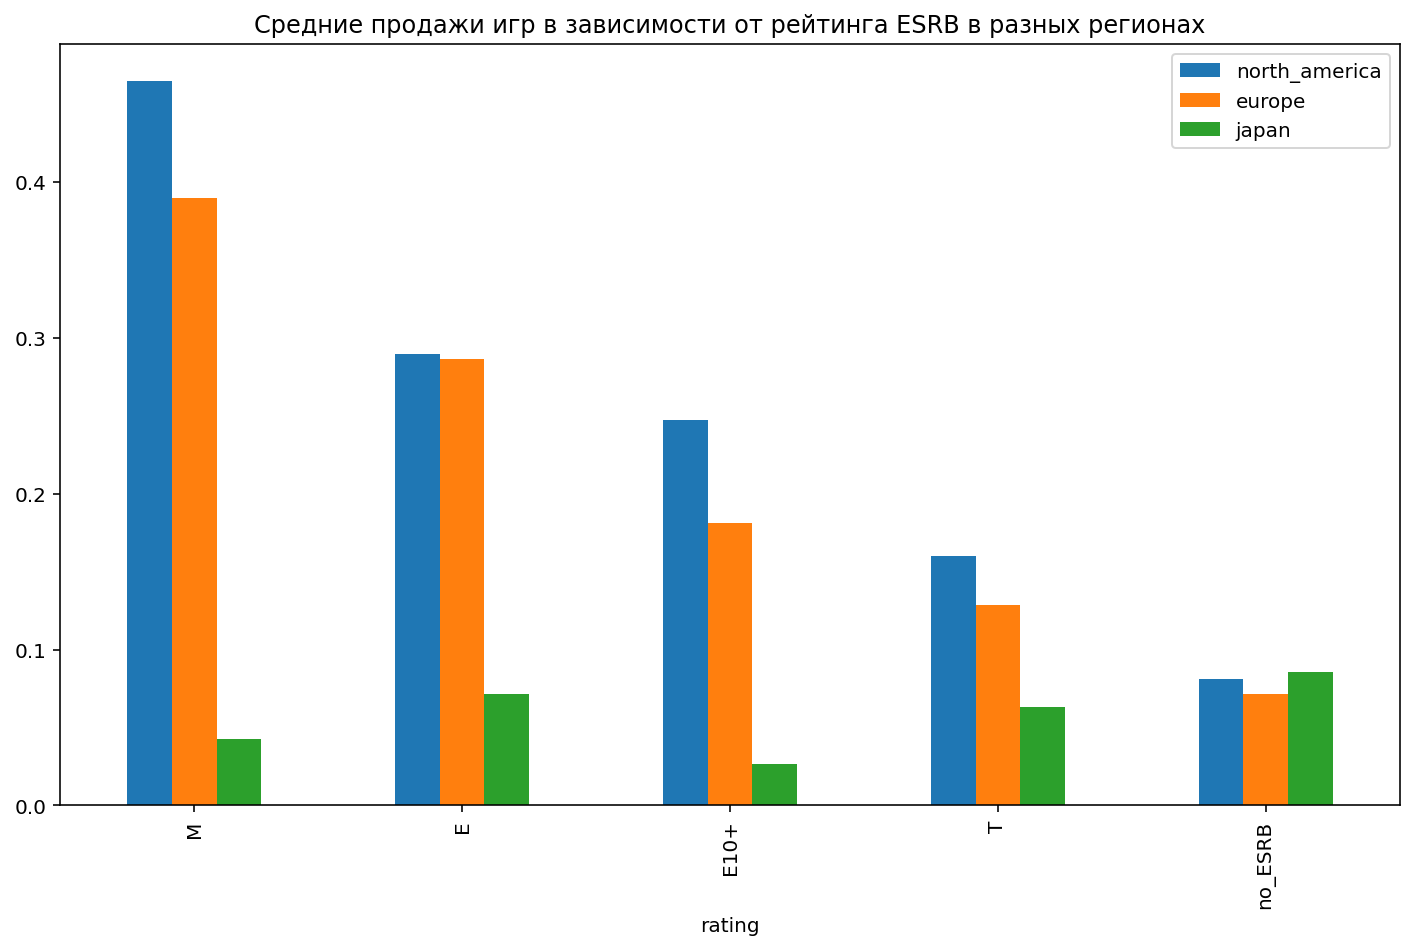

In [62]:
v_r.plot(kind='bar',figsize=(12, 7),
          title='Средние продажи игр в зависимости от рейтинга ESRB в разных регионах');

Рейтингом М (зрелые) отмечаются игры для взрослых.И мы видим их самую высокую популярность в Америке и Европе. Рейтинг E (игры для всех) практически одинаково популярны в Америке и в Европе. Игры рейтинга Е 10+(для всех старше 10 лет) по популярности проигрывают играм с рейтингом М и Е.в Европе популярность игр с такой маркировкой ниже, чем в Америке. Игры для подростков  идут на следующей позиции по продажам, и в Америке они также популярны больше, чем в Европе.
Следует отметить, что влияние этого рейтинга на продажи в Японии значительно ниже, чем в Америке и Европе. В азиатских странах есть свой рейтинг для видеоигр. Однако по имеющимся данным можно сказать, что в Японии более популярны игры для подростков и игры для всех. Игры для взрослых менее популярны. Возможно, так происходит из-за предпочтения игр других жанров, чем в Европе и Америке.
Значительную долю представляют игры без рейтинга (ожидающие рейтинга). Во всех трёх регионах их доля примерно одинаковая.
Рейтинг ESRB сильнее всего влияет на продажи в Северной Америке.

#### Общий вывод по разделу.
1. Во всех трёх регионах в актуальный период популярна среди лидеров игровых платформ присутствуют PS3 и PS4: во всех трёх регионах эти платформы вместе удерживают от четверти до половины рынка. 
Платформа 3DS  безусловный лидер на рынке Японии - удерживает 45,6% рынка.И представлена в других регионах в объеме до 10%. Платформа Х360 лидирующей является в Америке и Европе (до четверти рынка). В этих двух регионах представлена также платформа XOne (до 15,8 % рынка)
На рынке Японии в числе лидирующих представлены платформы PSV и WiiU. В Европе и америке этихплатформ нет среди лидирующих.
2. Предпочтения пользователей по жанрам Action и Role-Playing присутствуют во всех трёх регионах. В Европе и Америке популярны жанры Sports и Shooter, в Японии этих жанров нет среди лидеров продаж. В Японии среди лидеров продаж есть жанры Fighting, Simulation и Misc, в Европе и Америке отсутствует жанр Simulation, жанр Misc присутствует в Америке.
3. Рейтинг ESPB сильнее всего влияет на продажи в Северной Америке,слабее всего - в Японии. В Японии более популярны игры с рейтингом "для подростков". В Европе и Америке самые популярные игры имеют рейтинг М - для зрелых.

## Проверяем гипотезы.

Для проверки заданы 2 гипотезы:
- Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотеза 1. Сформулируем нулевую и альтернативную гипотезы:
Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [63]:
# Сохраним в переменных XOne_us и PC_us соответствующие данные за период после 2012 года
xone_us= actual_period_data[(actual_period_data['platform']=='XOne') &\
                 (actual_period_data['user_score']!=0)]['user_score']
pc_us = actual_period_data[(actual_period_data['platform']=='PC') &\
                (actual_period_data['user_score']!=0)]['user_score']

#Посчитаем средний рейтинг пользователя для Xbox One платформы
xone_us.mean()

6.521428571428572

In [65]:
#Посчитаем средний рейтинг пользователя для PC платформы
pc_us.mean()

6.428640776699029

In [66]:
alpha = .05 #значение уровня статистической значимости
results = st.ttest_ind(xone_us.dropna(), pc_us.dropna(), equal_var=False)

print('p-значение: {:.5f}'.format (results.pvalue))

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.54895
Не получилось отвергнуть нулевую гипотезу


####  Вывод:
при сравнении пользовательских рейтингов двух платформ за период с 2012 года нулевую гипотезу отвергнуть не получилось. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Гипотеза 2. Сформулируем нулевую и альтернативную гипотезы:
Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='Red'>🛠 Не правильно сформулированы гипотезы.</font>

In [67]:
# Сохраним в переменных action_us иsports_us соответствующие данные за период после 2012 года
action_us= actual_period_data[(actual_period_data['genre']=='Action') &\
                 (actual_period_data['user_score']!=0)]['user_score']
sports_us = actual_period_data[(actual_period_data['genre']=='Sports') &\
                (actual_period_data['user_score']!=0)]['user_score']

In [68]:
#выведем среднюю оценку по жанру Спорт
sports_us.mean()

5.455897435897437

In [69]:
#Посчитаем среднюю оценку по жанру Экшн
action_us.mean()

6.825047801147227

In [70]:
alpha = .05  #значение уровня статистической значимости сделаем как общепринятое
results = st.ttest_ind(action_us.dropna(), sports_us.dropna(), equal_var=False)

print('p-значение: {:.5f}'.format (results.pvalue))

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.00000
Отвергаем нулевую гипотезу


Вывод: таким образом, на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

### Общий вывод по разделу.
Техническое задание и результат:
- Гипотеза 1.'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые'подтвердилась (её не удалось отвергнуть).
- Гипотеза 2.'Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные' - подтвердилась (Была сформулирована в качестве альтернативной. Поскольку нулевую гипотезу принято формулировать так, чтобы можно было использовать знак равенства.)
- При проверке гипотез использован метод ttest_ind с параметром equal_var = False, чтобы посчитать дисперсии выборок по отдельности, поскольку они не равны.

## Общие выводы по проекту.

Часть 1. Данные получены для обработки в форме таблицы формата .csv. Произведена предобработка данных для исследования: столбцы переименованы (приведены к единому регистру), в некоторых - заменён формат.
Выяснены причины появления пропусков в данных. Там, где это возможно, пропуски заполнены.
В таблицу с данными добавлен ещё один столбец со значениями по суммарным продажам во всех регионах.

Выводы по разделу 2.
В ходе исследовательского анализа данных выяснено следующее: С середины 90-хгодов прошлого столетия резко возрастает выпуск консольных игр. С 2010 года ориентировочно производство консольнных игр так же резко начинает снижаться. Видимо, это связано с началом создания мобильных приложений и мобильных игр. Изучив графики шести самых продаваемых платформ за 1992-2015 годы, делаем вывод:с момента появления платформы продажи резко идут вверх 5-7 лет, последующие 5-7 лет они идут на спад. Средний срок существования платформы - 10 - 12 лет. Учитывая техническое задание: определить основные признаки успешности компьютерной игры для планирования рекламных компаний на 2017 год - актуальным периодом для последующего исследования мы определили 2012 - 2016 годы. В актуальном периоде определили,что потенциально прибыльными являются платформы 3DS,PS3, PS4,XOne WiiU, PSV. На момент окончания 2016 года нет растущих платформ. Продажи перечисленных платформ идут на спад. (Медианы продаж у всех пяти платформ смещены в сторону минимальных значений). Влияние отзывов пользователей и критиков отобранных для анализа платформ на продажи по всем пяти платформам имеет общие черты: влияние отзывов пользователей - слабое или отсутствует, влияние отзывов критиков - средней тесноты. При анализе общих данных выяснено, что лидируют в продажах игры жаноров Action, Sports и Shooter. Игры жанра Strategy занимают в продажах самое последнее место. Возможно, в этом жанре просто нет качественных игр, которыми можно увлечь пользователя. 

Выводы по разделу 3 "Портрет пользователя".
Во всех трёх регионах в актуальный период популярна среди лидеров игровых платформ присутствуют PS3 и PS4: во всех трёх регионах эти платформы вместе удерживают от четверти до половины рынка. Платформа 3DS безусловный лидер на рынке Японии - удерживает 45,6% рынка.И представлена в других регионах в объеме до 10%. Платформа Х360 лидирующей является в Америке и Европе (до четверти рынка). В этих двух регионах представлена также платформа XOne (до 15,8 % рынка) На рынке Японии в числе лидирующих представлены платформы PSV и WiiU. В Европе и америке этихплатформ нет среди лидирующих.
Предпочтения пользователей по жанрам Action и Role-Playing присутствуют во всех трёх регионах. В Европе и Америке популярны жанры Sports и Shooter, в Японии этих жанров нет среди лидеров продаж. В Японии среди лидеров продаж есть жанры Fighting, Simulation и Misc, в Европе и Америке отсутствует жанр Simulation, жанр Misc присутствует в Америке.
Рейтинг ESPB сильнее всего влияет на продажи в Северной Америке,слабее всего - в Японии. В Японии более популярны игры срейтингом "для подростков. В Европе и Америке самые популярные игры имеют рейтинг М - для зрелых. Часть 4. Проверка гипотез. Для проверки были заданы 2 гипотезы: Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Вывод по первой гипотезе: при сравнении пользовательских рейтингов двух платформ за период с 2012 года нулевую гипотезу отвергнуть не получилось. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Вывод по второй гипотезе: мы отвергли нулевую гипотезу. Вырной будет считаться альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

Выводы по разделу 4 "Проверка гипотез".
Для проверки заданы 2 гипотезы:
Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Вывод по первой гипотезе: при сравнении пользовательских рейтингов двух платформ за период с 2012 года нулевую гипотезу отвергнуть не получилось. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Вывод по второй гипотезе: Таким образом, мы отвергли нулевую гипотезу. Вырной будет считаться альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Рекомендации.
Исходя из выявленных закономерностей, можно предложить заказчику следующее:

- Учесть выводы исследования при планировании рекламных компаний на каждый регион по отдельности. У пользователей Европы и Америки много общего,тогда как пользователь Японии во многом - другой.
- По региону Северная Америка:рекламный бюджет направитьна платформы X360 и PS4; учесть стабильность выручки при распределении рекламного бюджета по жанрам и отдать предпочтение жанрам Shooter и Sports (они демонстрируют стабильность выручки при продажах); рейтинг ESRB учитывать обязательно, самыми популярными будут игры с маркировкой М и Е.
- По региону Европа: рекламный бюджет направитьна платформы PS3 и PS4; учесть стабильность выручки при распределении рекламного бюджета по жанрам и отдать предпочтение жанрам Shooter и Sports (они демонстрируют стабильность выручки при продажах), рейтинг  ESRB может быть не актуален, поскольку во многих европейских странах естьсвой рейтинг для игр;
- По региону Япония: рекламный бюджет направитьна платформы 3DS и PS3; учесть стабильность выручки при распределении рекламного бюджета по жанрам и отдать предпочтение жанрам Role-Playing и Misk, рейтинг  ESRB не учитывать,поскольку в азиатских странах есть свой рейтинг для игр; учесть наибольшую популярность игр для подростков.
- Рейтинг критиков имеет незначительное влияние на продажи, можно использовать это при распределении бюджета. Рейтинг пользователей влияния на продажи не имеет.
- использовать принцыпы данного исследования при прогнозировании рекламных компаний на последующие годы.